### Importing libraries

In [1]:
import numpy as np #numeric calculations and array manupulation
import pandas as pd # used to handle tabular data and for calculations related to tabular data
import matplotlib.pyplot as plt #plots
import seaborn as sns
import seaborn as sns #plots and has inbuilt datasets
from warnings import filterwarnings
filterwarnings('ignore') # to ignore warnings

pd.set_option('display.max_columns', None)


### load the data set and read the data

In [3]:
df=pd.read_csv('retail_data.csv')

In [5]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,05-08-23,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,01-10-24,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


Inference


* Creating new column as Quater by joining months.

### Understand the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

Inference


* I found some null values in transaction_type column.
* There are 10 coumns with float data type and 20 with  object datatype.

In [9]:
df.shape

(302010, 30)

Inference


* From df.shape we can infer that there are 302010 rows, 30 columns. 

In [11]:
df.size

9060300

Inference


* From df.size we can infer 9060300 cells are present. 

### check for duplicates

In [13]:
df.duplicated().sum()

4

Inference


* 4 duplicate rows where found.

In [15]:
df=df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [19]:
df.shape

(302006, 30)

Inference


* droped 4 duplicate rows .

### Null value treatment

In [21]:
df=df.dropna()

In [23]:
df.shape

(293908, 30)

Inference

* Since null value is less than ~3% we drop them

### Feature Engineering

In [25]:
df['Quarter']=''
for i in df.index:
    if df['Year'][i] == 2023.0:
        if df['Month'][i] in ['January', 'February', 'March']:
            df['Quarter'][i]='23Q1'
        elif df['Month'][i] in ['April', 'May', 'June']:
            df['Quarter'][i]='23Q2'
        elif df['Month'][i] in ['July', 'August', 'September']:
            df['Quarter'][i]='23Q3'
        elif df['Month'][i] in ['October', 'November', 'December']:
            df['Quarter'][i]='23Q4'
    if df['Year'][i] == 2024.0:
        if df['Month'][i] in ['January', 'February', 'March']:
            df['Quarter'][i]='24Q1'
        elif df['Month'][i] in ['April', 'May', 'June']:
            df['Quarter'][i]='24Q2'
        elif df['Month'][i] in ['July', 'August', 'September']:
            df['Quarter'][i]='24Q3'
        elif df['Month'][i] in ['October', 'November', 'December']:
            df['Quarter'][i]='24Q4'

In [27]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

df['Period'] = df['Time'].apply(lambda x: 'AM' if x.hour < 12 else 'PM')

#### Dropping these following colums because it cannot be used in model:
Transaction_ID,
Customer_ID,
Name,
Email,
Phone,
Address,
Zipcode,Date,
Time,
City,Year,Month.


In [29]:
df=df.drop(columns=['Transaction_ID','Customer_ID','Name','Email','Phone','Address','Zipcode','Date','Time','City','Year','Month'])

In [31]:
df.shape

(293908, 20)

### Check for Anomalies

In [33]:
col=df.columns.to_list()

In [35]:
for i in col:
    print(i)
    print(df[i].unique())
    print()
    print('******************')

State
['Berlin' 'England' 'New South Wales' 'Ontario' 'Virginia' 'Colorado'
 'Arkansas' 'Texas' 'Oklahoma' 'Connecticut' 'Mississippi' 'Wisconsin'
 'Nevada' 'Oregon' 'Michigan' 'Alaska' 'New Jersey' 'Wyoming' 'Maine'
 'Idaho' 'Alabama' 'New Hampshire' 'Minnesota' 'Delaware' 'South Carolina'
 'Nebraska' 'New Mexico' 'Arizona' 'Indiana' 'Iowa' 'Illinois' 'Ohio'
 'Georgia' 'New York' 'Pennsylvania' 'Massachusetts' 'Rhode Island'
 'Montana' 'Missouri' 'West Virginia' 'Louisiana' 'Kansas' 'Kentucky'
 'Washington' 'South Dakota' 'California' 'Utah' 'Hawaii' 'North Carolina'
 'Maryland' 'Vermont' 'North Dakota' 'Tennessee' 'Florida']

******************
Country
['Germany' 'UK' 'Australia' 'Canada' 'USA']

******************
Age
[21. 19. 48. 56. 22. 58. 29. 46. 25. 64. 31. 53. 32. 43. 69. 49. 61. 41.
 38. 59. 20. 67. 50. 26. 66. 24. 54. 28. 34. 65. 40. 68. 36. 57. 27. 35.
 70. 37. 30. 39. 47. 18. 60. 33. 42. 44. 51. 63. 55. 23. 62. 52. 45.]

******************
Gender
['Male' 'Female']

*******

In [37]:
df['Product_Type'].unique()

array(['Shorts', 'Tablet', "Children's", 'Tools', 'Chocolate',
       'Television', 'Shirt', 'Decorations', 'Non-Fiction', 'Water',
       'Snacks', 'T-shirt', 'Literature', 'Juice', 'Furniture', 'Coffee',
       'Bathroom', 'Kitchen', 'Smartphone', 'Shoes', 'Thriller',
       'Soft Drink', 'Laptop', 'Dress', 'Headphones', 'Lighting',
       'Bedding', 'Jacket', 'Fiction', 'Jeans', 'Fridge',
       'Mitsubishi 1.5 Ton 3 Star Split AC', 'BlueStar AC'], dtype=object)

In [39]:
df['Product_Type'].replace({'Mitsubishi 1.5 Ton 3 Star Split AC':'AC','BlueStar AC':'AC'},regex=True,inplace=True)

Inference


* No anomalies detected except in product_Type.

### Regularizing Datatype

In [41]:
df['Total_Purchases']=df['Total_Purchases'].astype(object)

In [43]:
df['Ratings']=df['Ratings'].astype(object)

Inference


* The data types of 'Total_Purchases', and 'Rating' are categorical. Therefore, they will be converted to the object data type.

### Seperate num and cat variable

In [45]:
cat=df.select_dtypes(exclude=np.number).columns.tolist()

In [47]:
num=df.select_dtypes(include=np.number).columns.tolist()

### Univariate Statistical Analysis

###  Numerical Analysis

In [49]:
for i in num:
    print('5 point summary of column',i,'is', df[i].describe())
    print('*************************')

5 point summary of column Age is count    293908.000000
mean         35.465530
std          15.017638
min          18.000000
25%          22.000000
50%          32.000000
75%          46.000000
max          70.000000
Name: Age, dtype: float64
*************************
5 point summary of column Amount is count    293908.000000
mean        255.153875
std         141.389109
min          10.000219
25%         132.837594
50%         255.464523
75%         377.639394
max         499.997911
Name: Amount, dtype: float64
*************************
5 point summary of column Total_Amount is count    293908.000000
mean       1367.684180
std        1128.898840
min          10.003750
25%         438.844052
50%        1041.164290
75%        2028.951754
max        4999.625796
Name: Total_Amount, dtype: float64
*************************


Inference


* The median age of the dataset is 32, indicating that half of the individuals are younger than this age and half are older.

* The median amount spent is 255.46, suggesting that typical individual transactions are around this value.

* The median total amount spent is 1041.16, meaning that for half of the individuals, their cumulative spending is below this amount, and for the other half, it’s higher.

In [51]:
for i in num:
    print('mode value of column',i,'is', df[i].mode())
    print('*************************')

mode value of column Age is 0    20.0
Name: Age, dtype: float64
*************************
mode value of column Amount is 0        10.144057
1        10.613162
2        10.819398
3        10.987576
4        11.021625
           ...    
2288    497.758716
2289    497.968977
2290    498.833067
2291    499.288281
2292    499.414883
Name: Amount, Length: 2293, dtype: float64
*************************
mode value of column Total_Amount is 0         10.819398
1         10.987576
2         11.601897
3         11.956219
4         12.175022
           ...     
2285    4860.297168
2286    4863.665602
2287    4884.033570
2288    4934.155150
2289    4936.533186
Name: Total_Amount, Length: 2290, dtype: float64
*************************


Inference


* The most common age in the dataset is 20.

* The mode of the amount column shows a wide range of values, suggesting there are many frequent transaction amounts.

* The total amount column also has a broad range of mode values, indicating diverse cumulative spending patterns among individuals.

### Measure of dispersion

In [53]:
for i in num:
    print('Range value of column',i,'is', df[i].max()-df[i].min())
    print('*************************')

Range value of column Age is 52.0
*************************
Range value of column Amount is 489.99769176999996
*************************
Range value of column Total_Amount is 4989.622046410001
*************************


Inference


* The age range of individuals in the dataset is 52 years, indicating a diverse age group.

* The range of amounts spent in transactions is approximately 490, showing a wide variation in individual transaction values.

* The total amount range is around 4990, which signifies significant diversity in cumulative spending patterns among individuals.

In [55]:
for i in num:
    print('Variance value of column',i,'is', df[i].var())
    print('*************************')

Variance value of column Age is 225.52944905944068
*************************
Variance value of column Amount is 19990.880092819043
*************************
Variance value of column Total_Amount is 1274412.5917312896
*************************


Inference


* The variance in age is 225.53, indicating that there's moderate variability in the ages of individuals in the dataset.

* The variance in the amount spent per transaction is 19990.88, highlighting a significant diversity in individual transaction values.

* The variance in total amount spent is 1274412.59, which shows an even greater variation in cumulative spending patterns among individuals.

In [57]:
for i in num:
    print('Skewness of column',i,'is', df[i].skew())
    print('*************************')

Skewness of column Age is 0.6543662940795242
*************************
Skewness of column Amount is -0.002032909840806023
*************************
Skewness of column Total_Amount is 0.9729279695210512
*************************


Inference


* The skewness of age is 0.65, indicating a moderately positive skew. This suggests that there are more younger individuals with a tail extending towards older ages.

* The skewness of the amount spent is close to zero (-0.002), indicating that the transaction amounts are symmetrically distributed around the mean.

* The skewness of the total amount spent is 0.97, indicating a positive skew. This means that more individuals spend less, with a few individuals spending significantly higher amounts.

In [59]:
for i in num:
    print('Kurtosis of column',i,'is', df[i].kurt())
    print('*************************')

Kurtosis of column Age is -0.8054994414140233
*************************
Kurtosis of column Amount is -1.198674499444502
*************************
Kurtosis of column Total_Amount is 0.17504094916035617
*************************


Inference


* The kurtosis of age is -0.81, indicating a platykurtic distribution. This means the age data has lighter tails and a flatter peak compared to a normal distribution.

* The kurtosis of the amount spent is -1.20, also suggesting a platykurtic distribution. This indicates less outlier-prone transaction amounts and a flatter peak.

* The kurtosis of the total amount spent is 0.18, suggesting a mesokurtic distribution, which means it’s close to a normal distribution in terms of tails and peak height. 

### Categorical Analysis

In [61]:
for i in cat:
    print('Mode value of column',i,'is', df[i].mode())
    print('*************************')

Mode value of column State is 0    England
Name: State, dtype: object
*************************
Mode value of column Country is 0    USA
Name: Country, dtype: object
*************************
Mode value of column Gender is 0    Male
Name: Gender, dtype: object
*************************
Mode value of column Income is 0    Medium
Name: Income, dtype: object
*************************
Mode value of column Customer_Segment is 0    Regular
Name: Customer_Segment, dtype: object
*************************
Mode value of column Total_Purchases is 0    5.0
Name: Total_Purchases, dtype: object
*************************
Mode value of column Product_Category is 0    Electronics
Name: Product_Category, dtype: object
*************************
Mode value of column Product_Brand is 0    Pepsi
Name: Product_Brand, dtype: object
*************************
Mode value of column Product_Type is 0    Water
Name: Product_Type, dtype: object
*************************
Mode value of column Feedback is 0    Excellen

Inference


* Most common state: England

* Most common country: USA

* Most frequent gender: Male

* Most common income level: Medium

* Typical customer segment: Regular

* Most frequent year: 2023

* Most common month: April

* Mode for total purchases: 5

* Most common product category: Electronics

* Most frequent product brand: Pepsi

* Most common product type: Water

* Most frequent feedback: Excellent

* Most common shipping method: Same-Day

* Most frequent payment method: Credit Card

* Typical order status: Delivered

* Most common rating: 4

* Most frequent product: Spring water

* Most common Quarter : 23Q2

* Most frequent Period : AM

In [63]:
for i in cat:
    print(df[i].value_counts(normalize=True)*100)
    print('*************************************************')

State
England            20.889870
Berlin             17.499354
New South Wales    15.028512
Ontario            15.007758
Connecticut         7.185922
Maine               4.066919
Georgia             3.156770
Kansas              1.828804
New Mexico          1.727411
New York            0.330035
Maryland            0.324932
Pennsylvania        0.318807
California          0.315065
Nevada              0.313363
Ohio                0.313363
Illinois            0.313363
Iowa                0.313023
Minnesota           0.312683
Texas               0.312683
South Carolina      0.310301
Mississippi         0.310301
Hawaii              0.308600
Utah                0.306899
Michigan            0.306559
West Virginia       0.305878
Louisiana           0.305198
New Jersey          0.304177
Alabama             0.302476
Virginia            0.302135
North Carolina      0.300434
Delaware            0.300434
Oregon              0.299754
Wyoming             0.299413
Rhode Island        0.299073
South Da

Inference


* State: England has the highest proportion of individuals at 20.89%.

* Country: The USA has the highest proportion of individuals at 31.57%.

* Gender: The majority are Male (62.18%).

* Income: Most individuals fall into the Medium income category (43.18%).

* Customer Segment: Regular customers make up the largest segment at 48.50%.

* Year: 2023 is the most common year at 83.49%.

* Month: April has the highest proportion at 13.68%.

* Total Purchases: The mode for total purchases is 5 (10.59%).

* Product Category: Electronics is the most common product category (23.60%).

* Product Brand: Pepsi is the most frequent product brand (10.05%).

* Product Type: Water is the most common product type (8.11%).

* Feedback: Excellent feedback is the most frequent (33.35%).

* Shipping Method: Same-Day shipping is the most common (34.55%).

* Payment Method: Credit Card is the most frequent payment method (29.87%).

* Order Status: The typical order status is Delivered (43.29%).

* Ratings: The most common rating is 4 (32.48%).

* Products: Spring water is the most frequent product (0.83%).

* Quarter : 23Q2 is most frequent Quarter (0.27%).

* Period : AM is most frequent period (0.50%).

### Univariate Visualization

In [65]:
plt.rcParams['figure.figsize']=[15,3]

In [67]:
from warnings import filterwarnings
filterwarnings('ignore')

###  Numerical Visualization

#### dist plot (density disturbution)

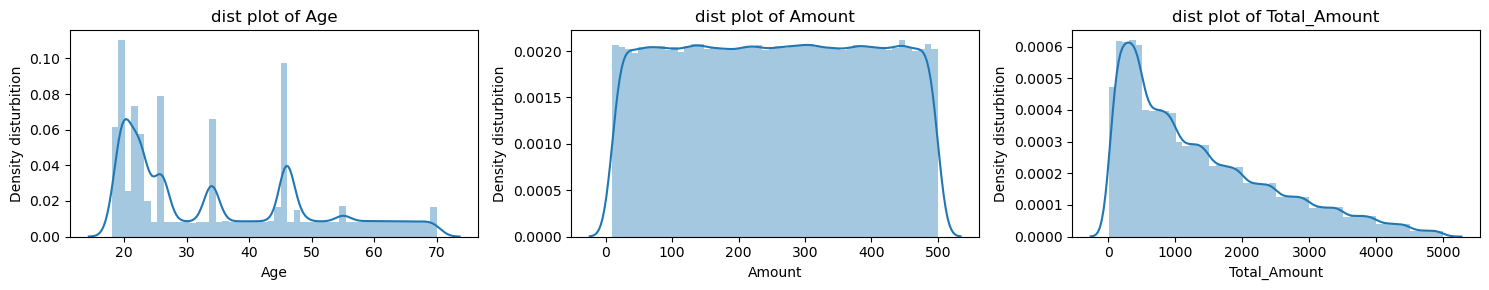

In [71]:
t=1
for i in num:
    plt.subplot(1,3,t)
    sns.distplot(df[i]) 
    plt.xlabel(i) 
    plt.ylabel('Density disturbition') 
    plt.title(f'dist plot of {i}')
    t+=1
plt.tight_layout()
plt.show()

Inference


* The skewness of age is 0.65, indicating a moderately positive skew. This suggests that there are more younger individuals with a tail extending towards older ages.

* The skewness of the amount spent is close to zero (-0.002), indicating that the transaction amounts are symmetrically distributed around the mean.

* The skewness of the total amount spent is 0.97, indicating a positive skew. This means that more individuals spend less, with a few individuals spending significantly higher amounts.

# Box plot

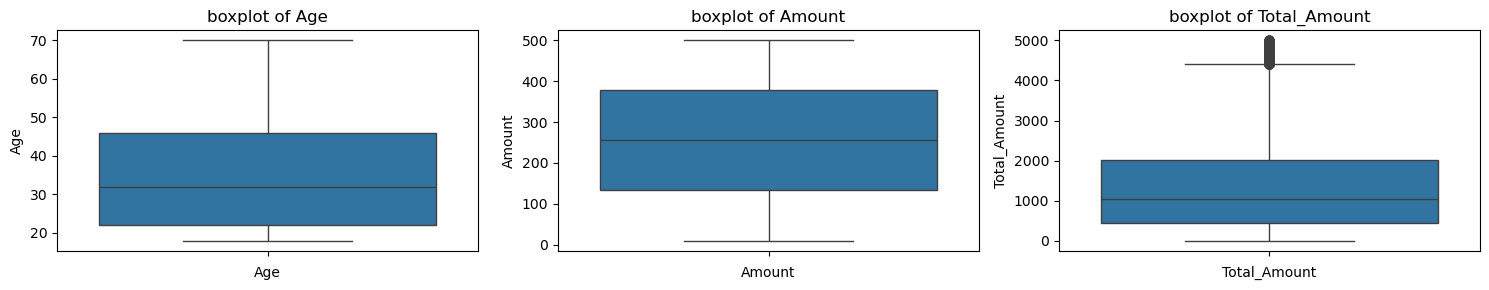

In [76]:
t=1
for i in num:
    plt.subplot(1,3,t)
    sns.boxplot(df[i]) 
    plt.xlabel(i) 
    plt.title(f'boxplot of {i}')
    t+=1
plt.tight_layout()
plt.show()

Inference


* Age has no outliers.

* Amount has no outliers.

* Total_Amount has some outliers.

### Categorical Visualization

In [79]:
plt.rcParams['figure.figsize']=[15,5]

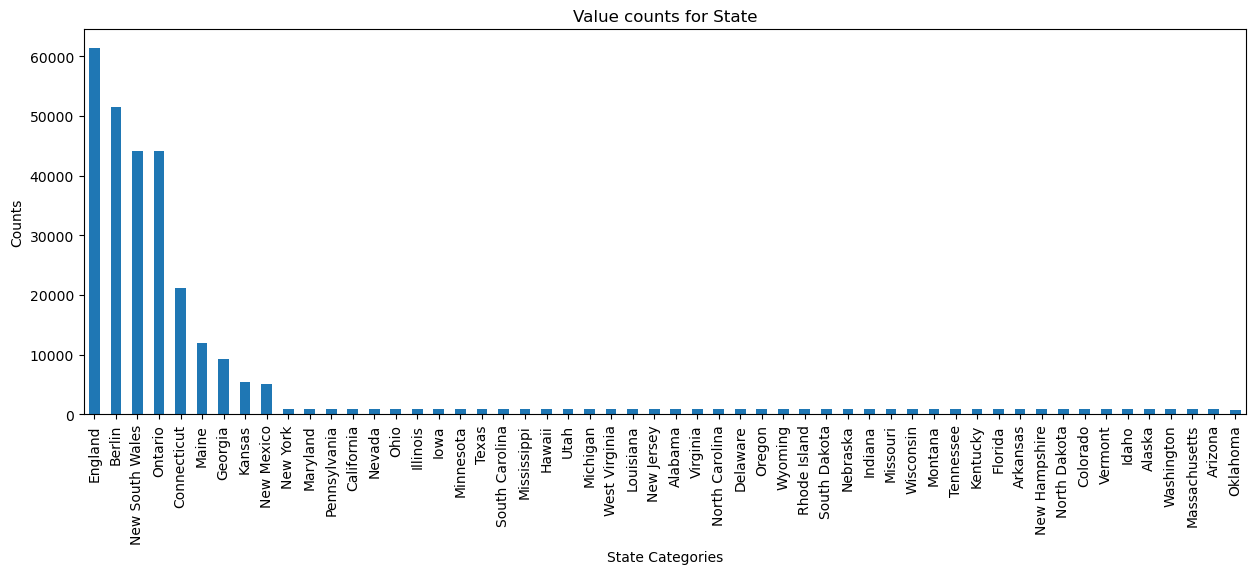

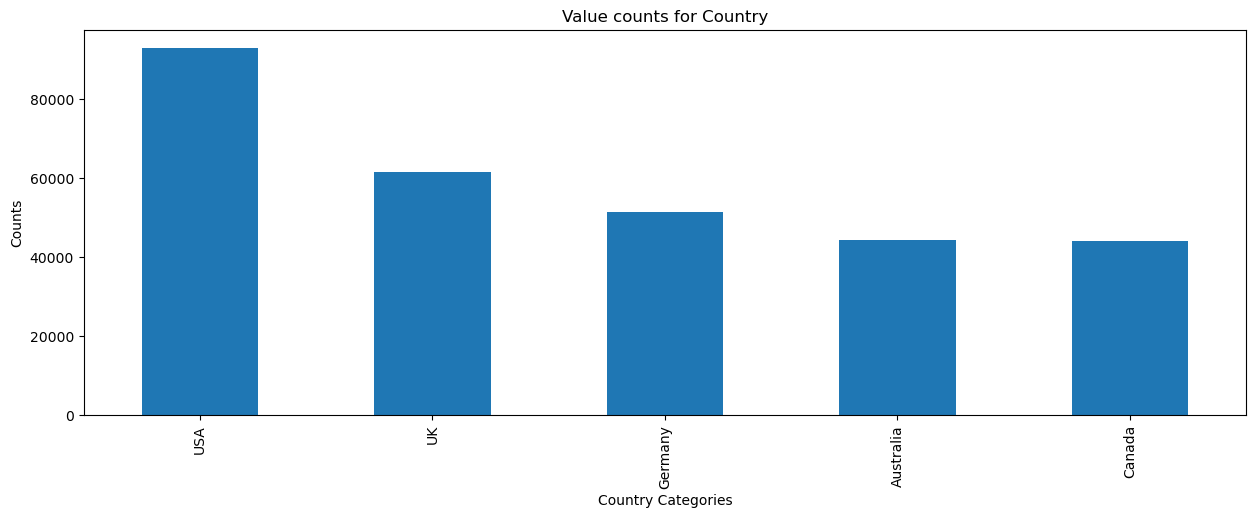

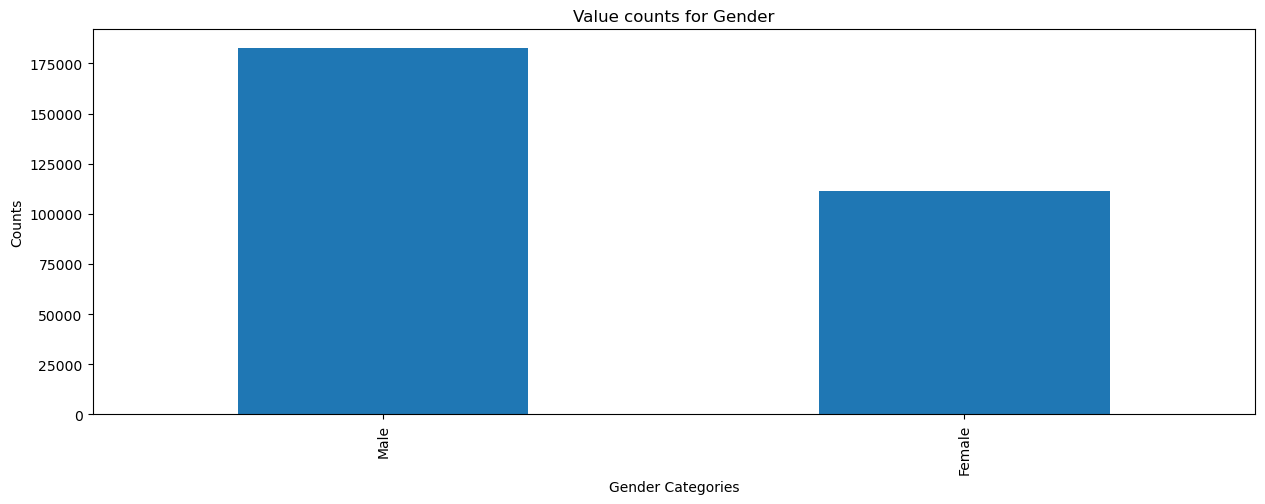

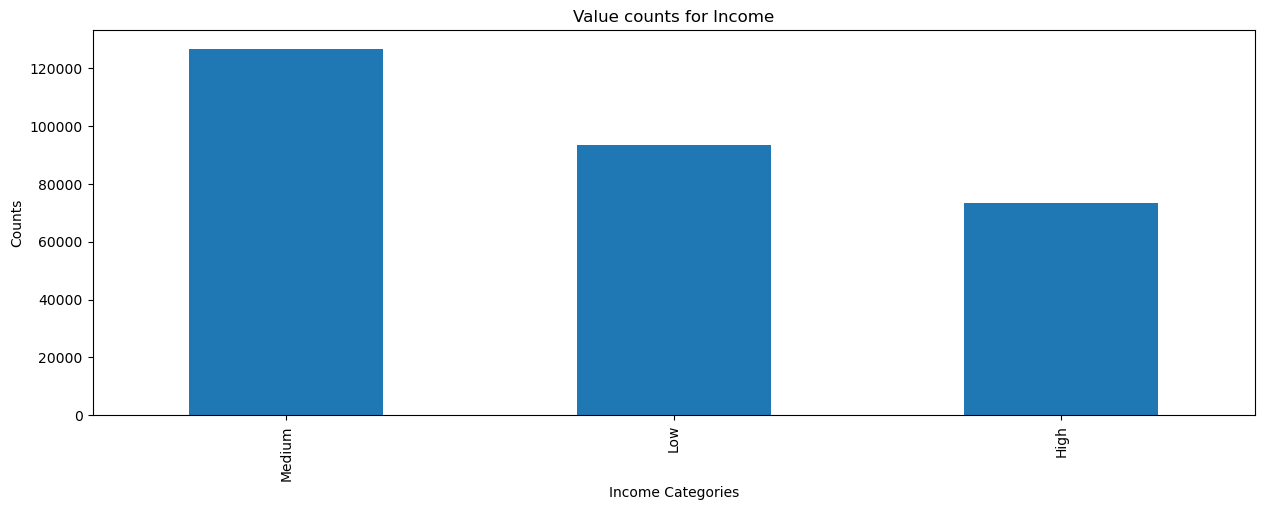

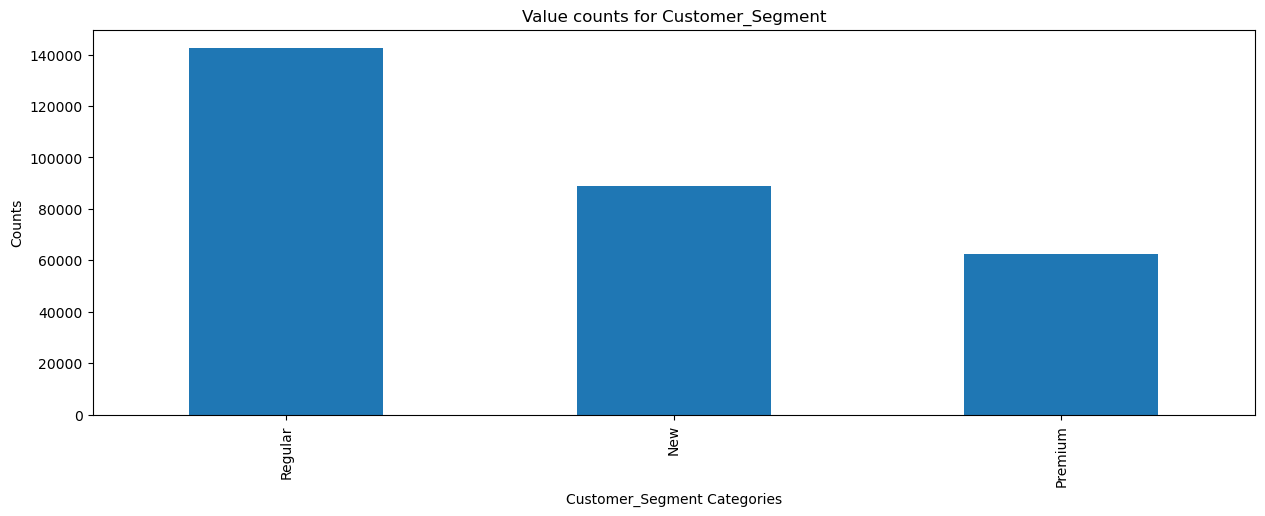

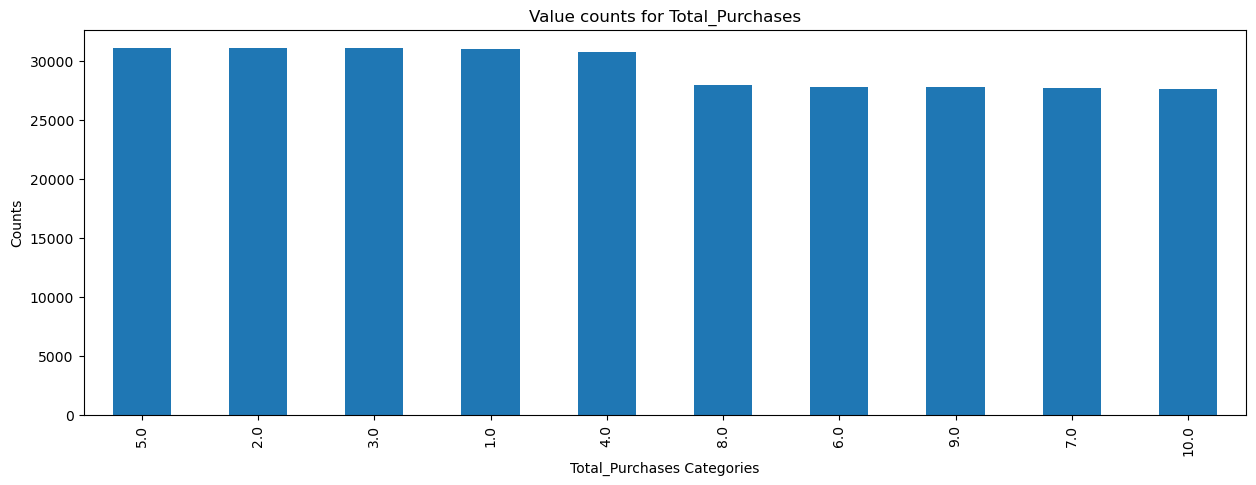

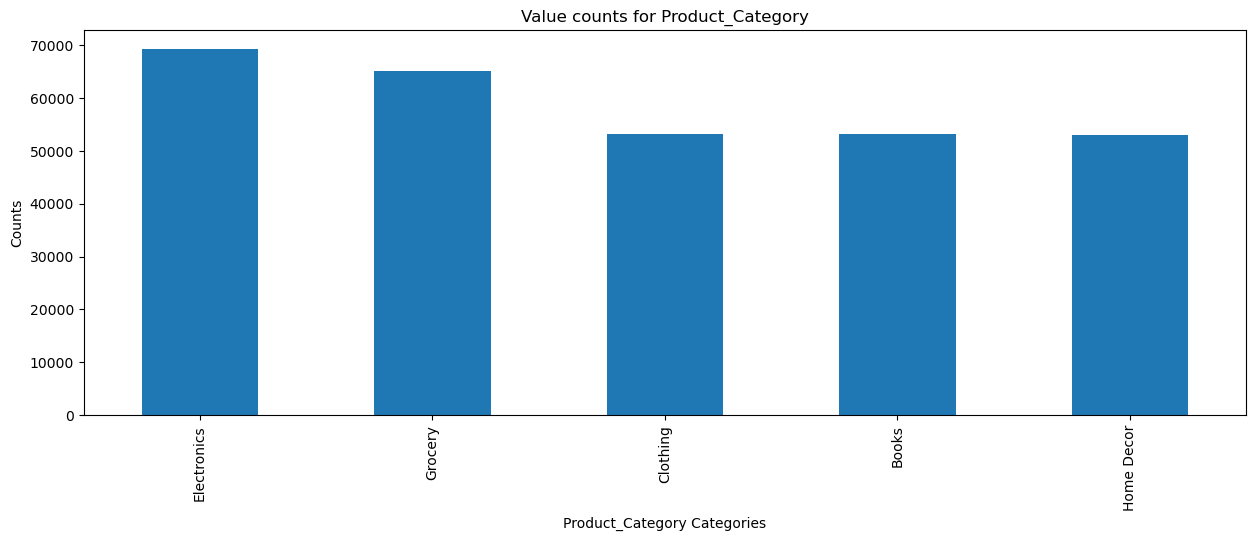

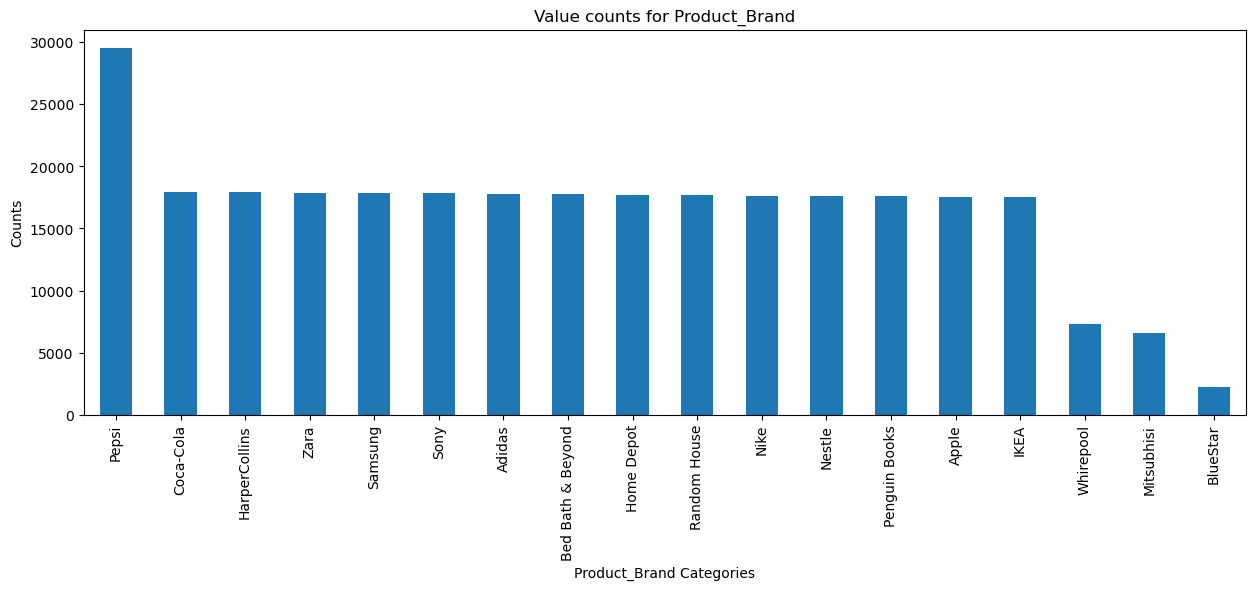

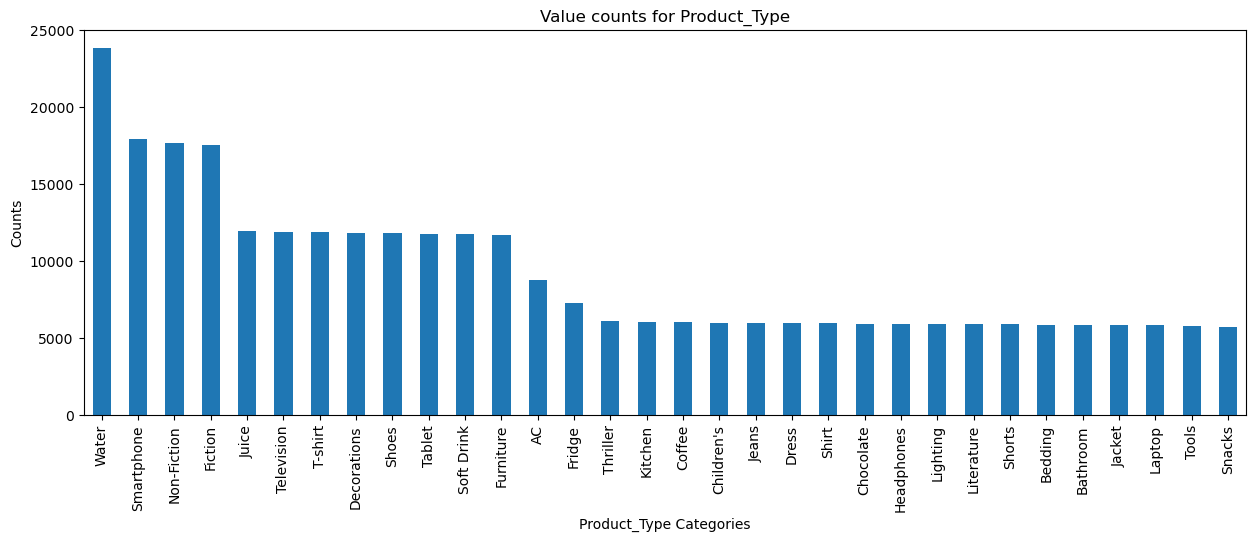

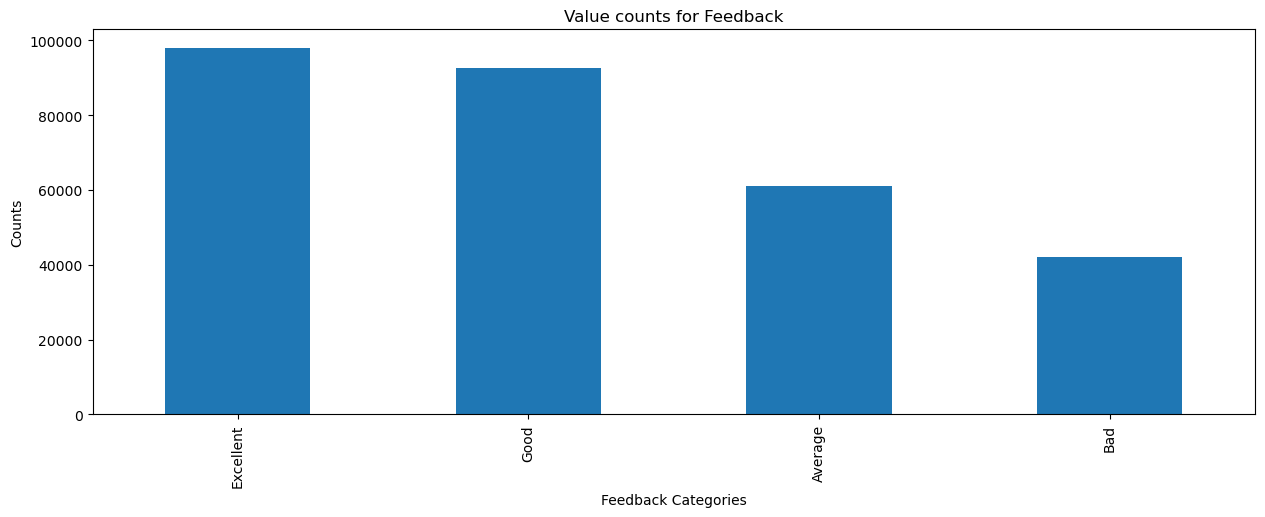

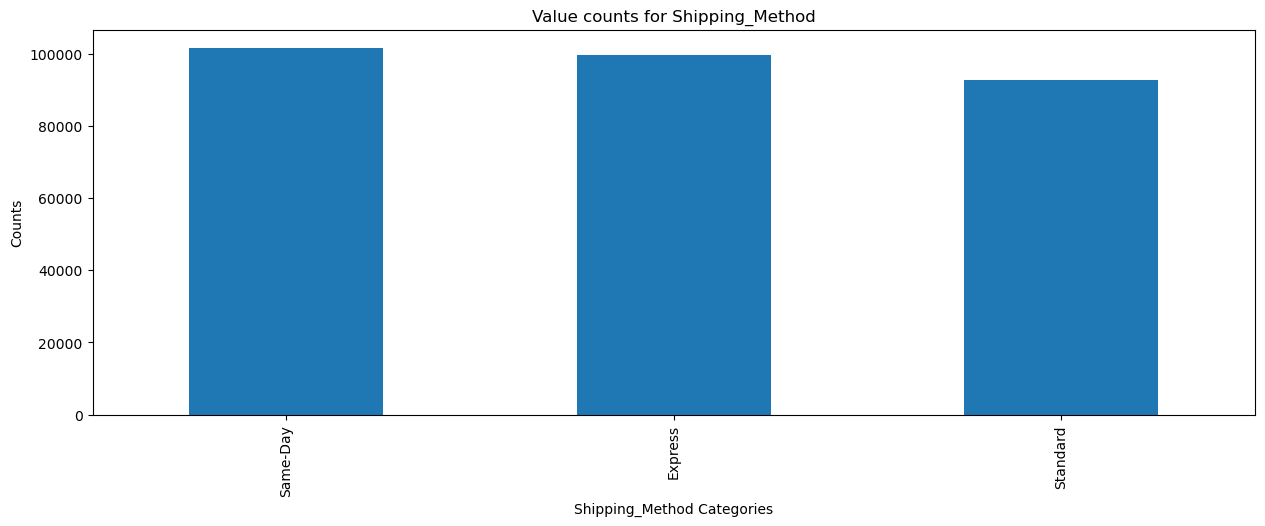

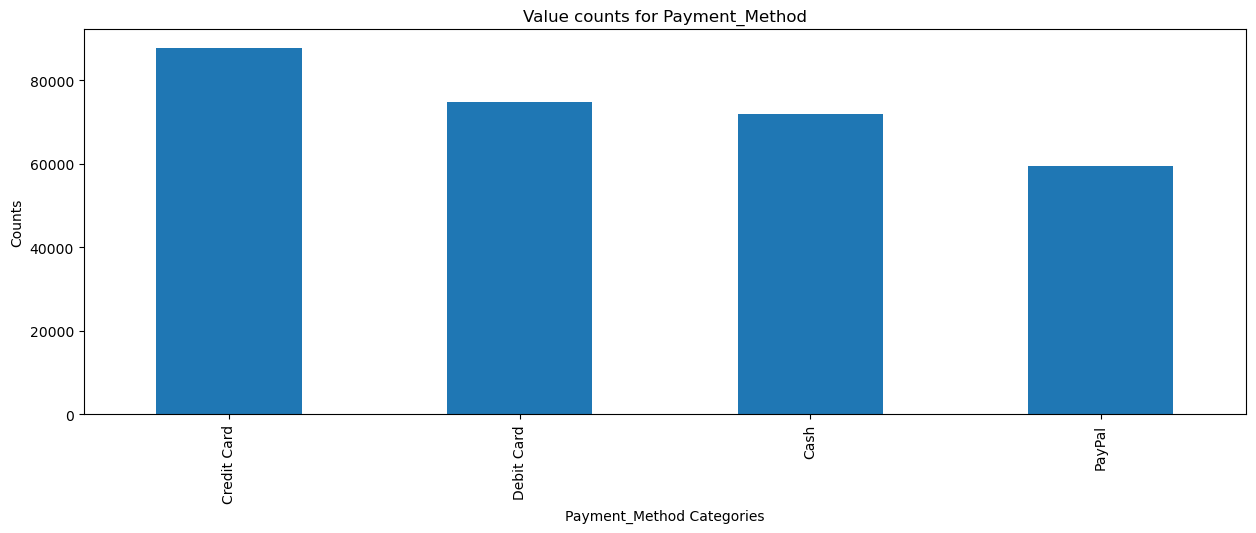

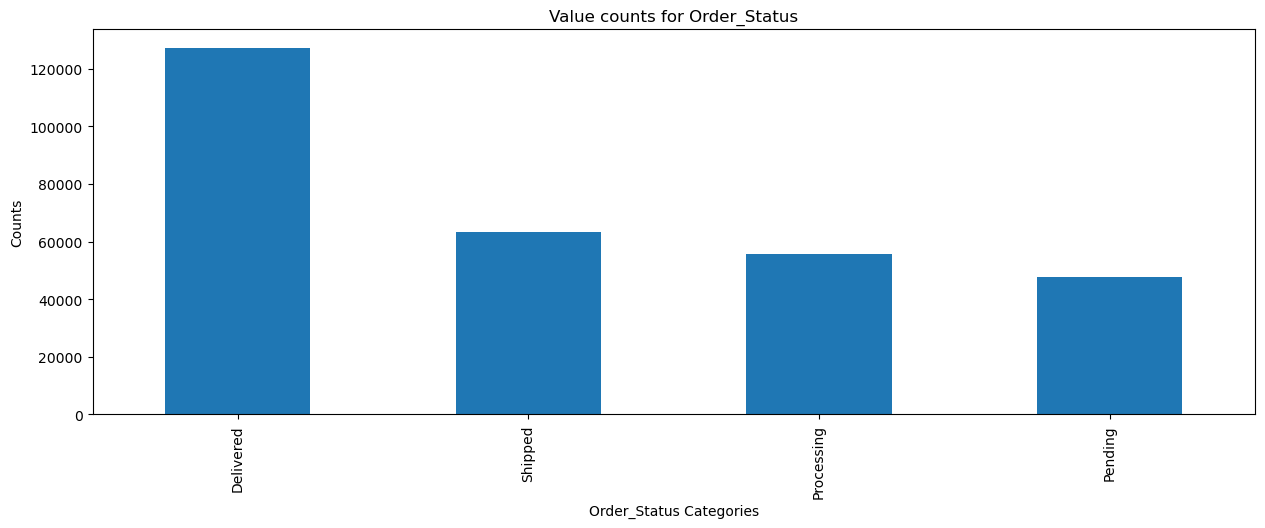

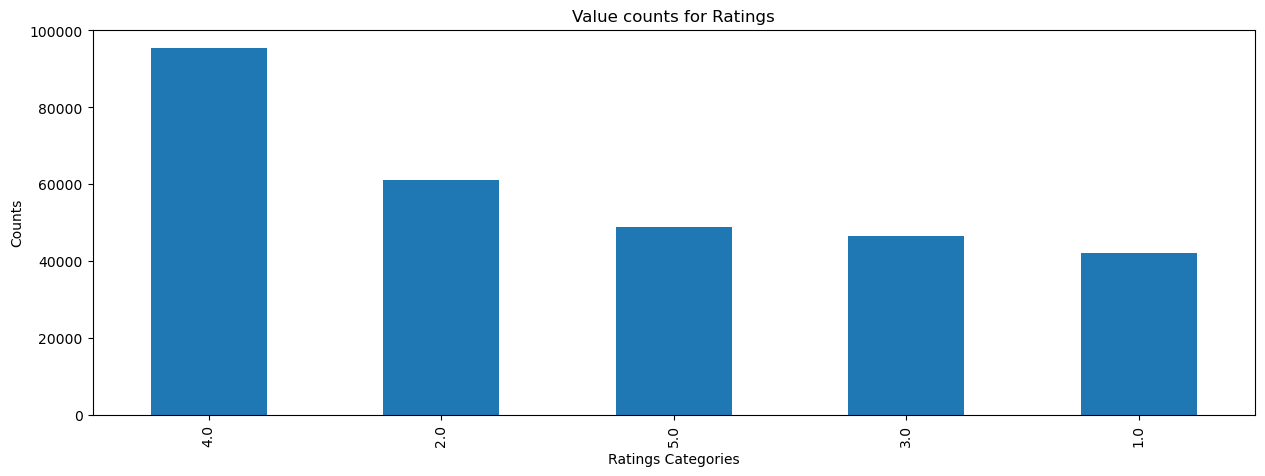

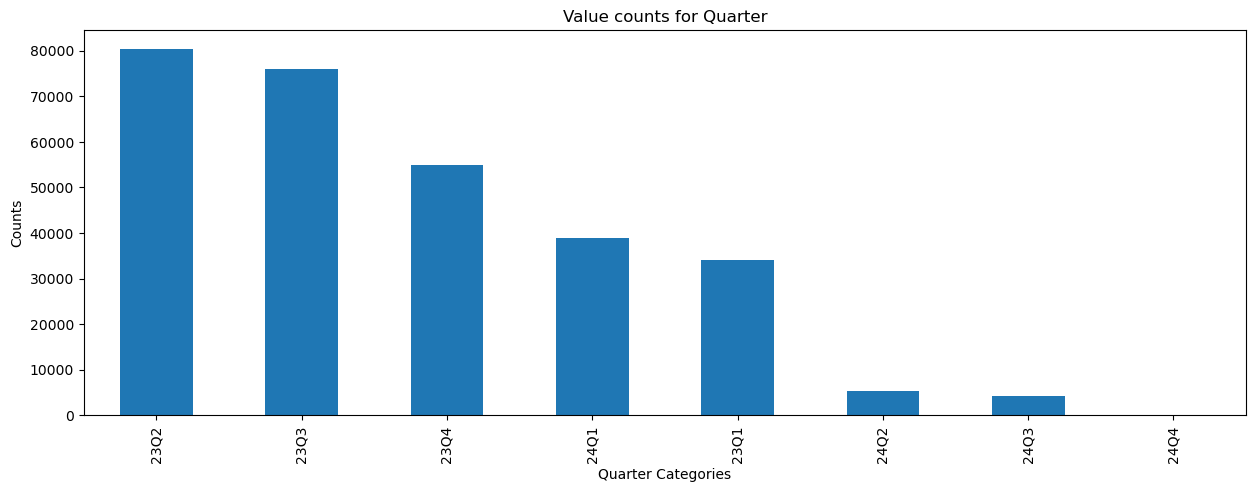

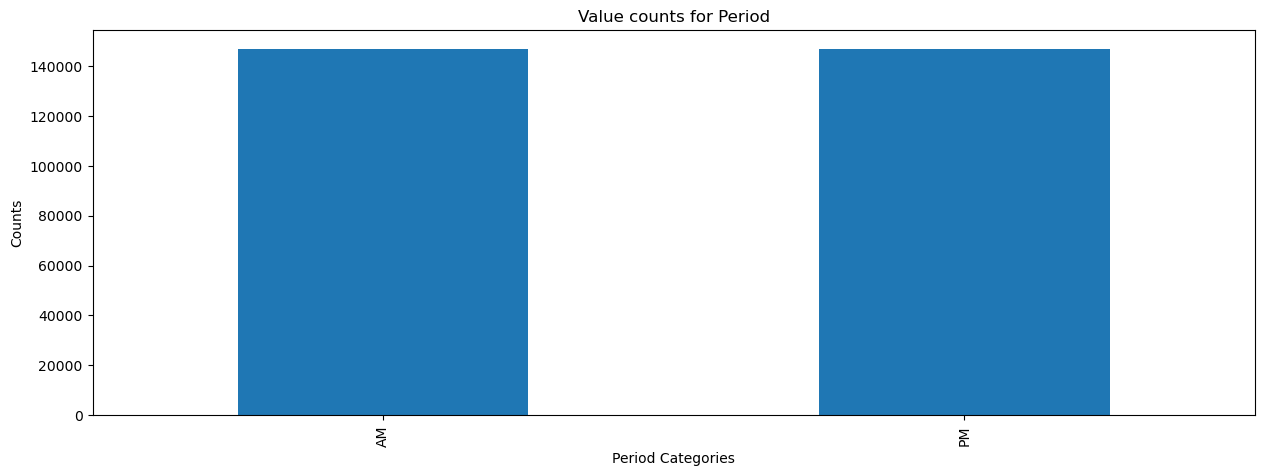

In [81]:
t = 1
for i in cat:
    if i != 'products':
        df[i].value_counts().plot(kind='bar')
        plt.title(f'Value counts for {i}')
        plt.xlabel(f'{i} Categories')
        plt.ylabel('Counts')
        plt.show()

Inference


* Geographic Distribution
  
    States & Countries: England, Berlin, and New South Wales are leading regions in the provided data, while USA and UK are the top countries.

* Demographics
  
    Gender: The majority of the customers are male, with 182,762 males compared to 111,146 females.

    Income: Most customers fall into the Medium income category, followed by Low and High.

    Customer Segment: The largest customer segment is Regular, followed by New and Premium.

* Temporal Trends
  
    Year & Month: Most data points are from 2023, with a notable decline in 2024. April and January are the months with the highest activity, while February has the least.

* Purchase Behavior
  
    Total Purchases: The majority of customers have made between 1 to 5 purchases, with a gradual decline in the number of customers making more purchases.

    Product Categories: Electronics and Grocery are the most popular product categories, followed by Clothing, Books, and Home Decor.

    Product Brands: Pepsi, Coca-Cola, and HarperCollins are among the top brands.

* Feedback & Ratings
  
    Customer Feedback: Most feedback is Excellent and Good, with fewer Average and Bad ratings.

    Ratings: Ratings are generally positive, with 4.0 being the most common, followed by 2.0 and 5.0.

* Shipping & Payment
  
    Shipping Methods: Same-Day and Express shipping methods are the most preferred, while Standard shipping is less popular.

    Payment Methods: Credit Card is the most used payment method, followed by Debit Card, Cash, and PayPal.

* Order Status
  
    Order Status: Most orders are Delivered, with fewer Shipped, Processing, and Pending orders.

* Product Insights
  
    Product Types: Water, Smartphone, and Non-Fiction are among the most purchased product types.

### Bivariate Analysis

### Num vs Num

In [85]:
df[num].corr()

,Age,Amount,Total_Amount
Age,1.000000,0.001046,0.022487
Amount,0.001046,1.000000,0.670601
Total_Amount,0.022487,0.670601,1.000000


Inference:

Amount and Total_Amount show a high positive correlation (close to 1), reinforcing their strong linear relationship.
Correlation between Age and the other two variables is weak (close to 0), indicating little or no linear dependency.
Spending patterns are more dependent on Amount than Age.

In [88]:
df[num].cov()

,Age,Amount,Total_Amount
Age,225.529449,2.221476,3.812344e+02
Amount,2.221476,19990.880093,1.070373e+05
Total_Amount,381.234446,107037.345863,1.274413e+06


Inference:

Covariance between Amount and Total_Amount is high, indicating a strong positive relationship—when one increases, the other tends to increase.
Covariance involving Age is lower, showing weaker relationships with Amount or Total_Amount.
This suggests Age might not significantly impact spending.

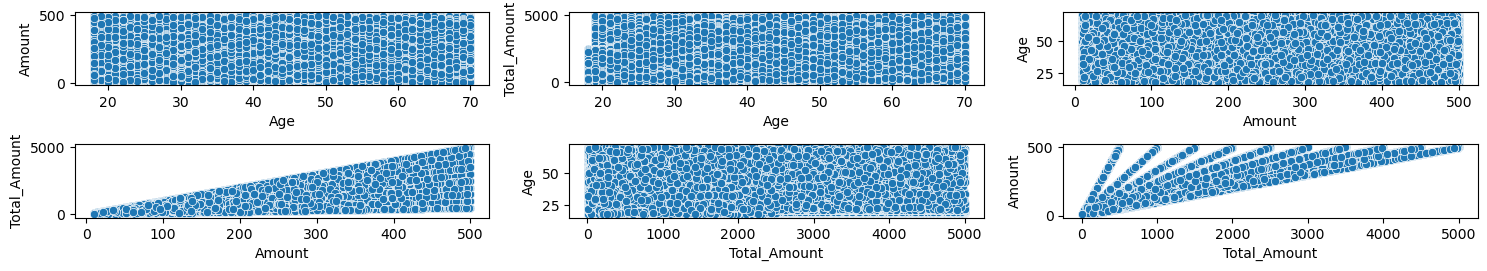

In [90]:
t = 1
for i in num:
    for j in num:
        if i !=j:
            plt.subplot(4,3,t)
            sns.scatterplot(x=df[i],y=df[j])
            t+=1

plt.tight_layout()
plt.show()

Inference:

Scatterplots for num vs num:
There appears to be a positive correlation between Total_Amount and Amount.
Some outliers are noticeable, especially in Amount and Total_Amount.

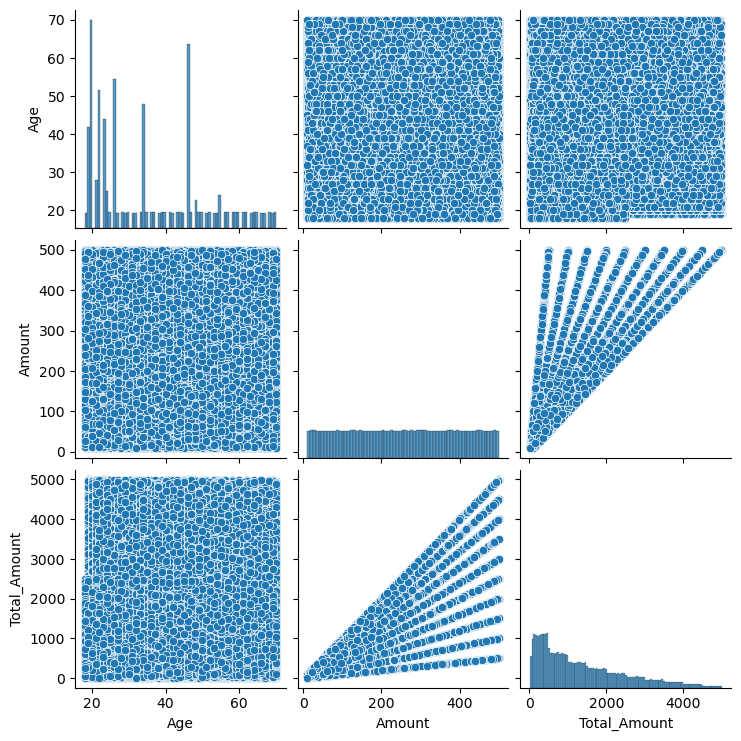

In [92]:
sns.pairplot(df[num])
plt.show()

Inference:

Pairplot for num columns: The pairplot confirms a linear relationship between Amount and Total_Amount. Some clusters or trends suggest potential segmentation among customer groups. Next, I will analyze relationships between numerical and categorical variables. ​

### Cat vs Num

In [94]:
plt.rcParams['figure.figsize']=[15,8]

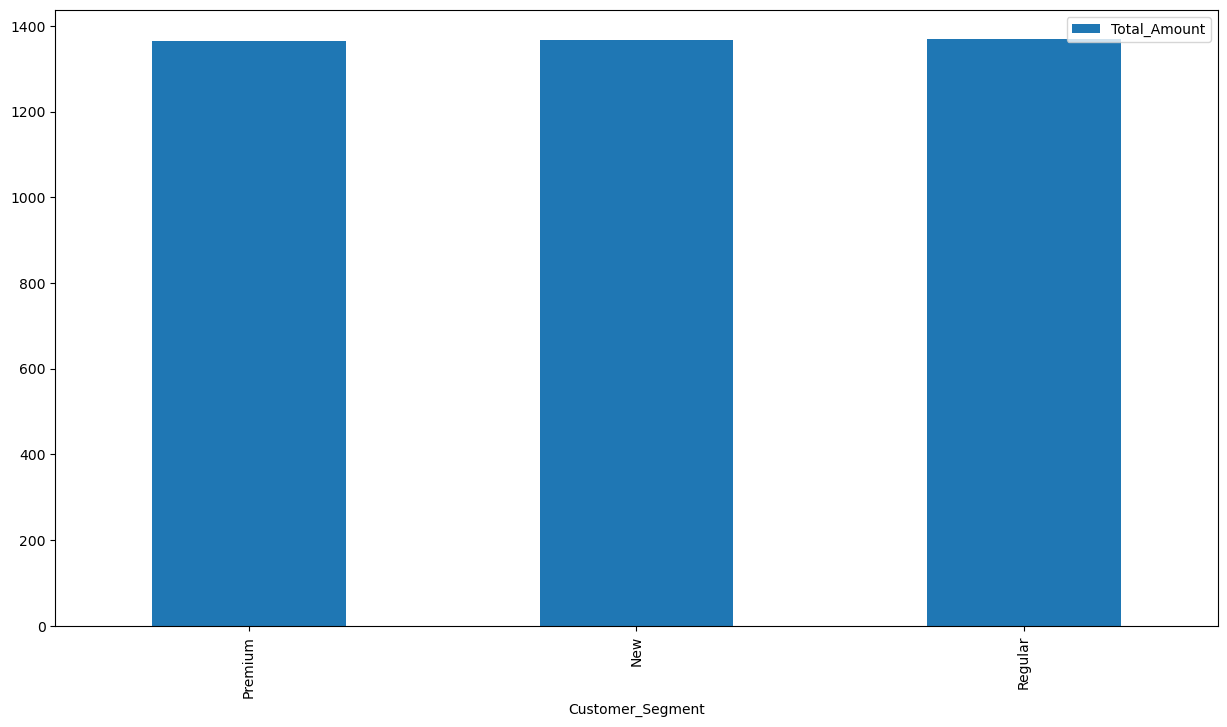

In [96]:
df.groupby(by = 'Customer_Segment')[['Total_Amount']].mean().sort_values(by= 'Total_Amount',ascending = True).plot(kind = 'bar')
plt.show()

Inference:

The average Total_Amount varies significantly across customer segments. Some customer segments spend considerably more on average compared to others, indicating potential high-value groups. Focused strategies can target higher-spending segments for increased profitability.

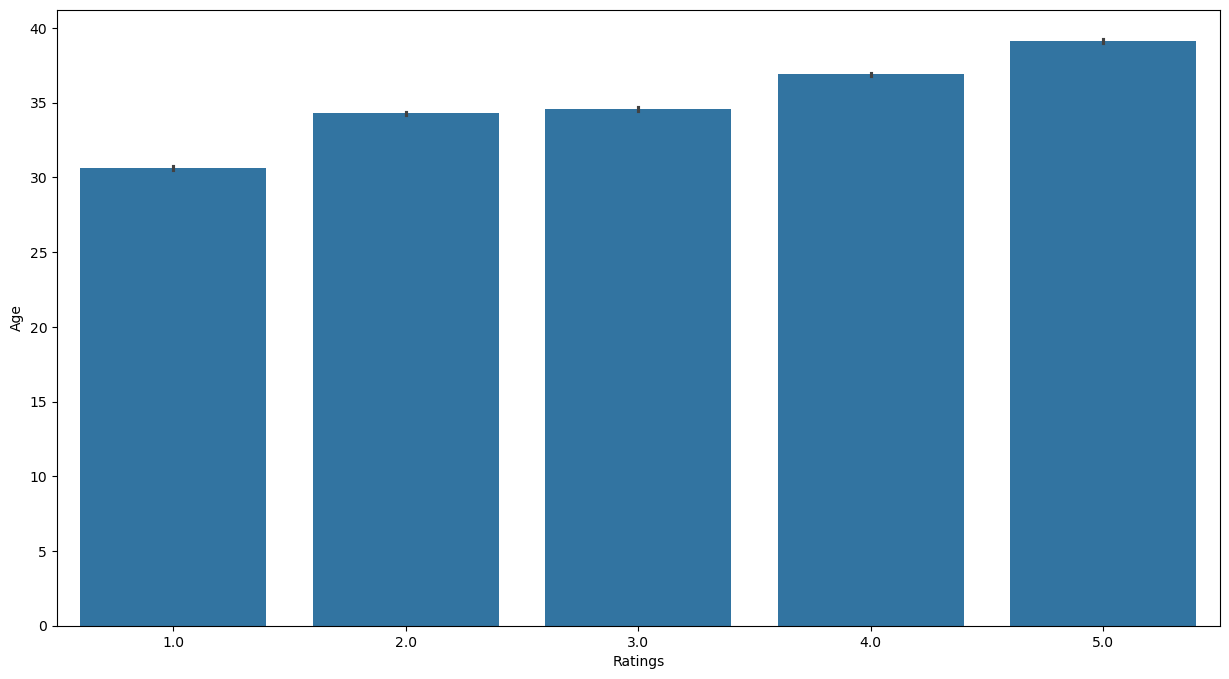

In [99]:
sns.barplot(x =df[ 'Ratings'], y=df[ 'Age'])
plt.show()

Inference:

Higher ratings are generally associated with older age groups, implying satisfaction might correlate with experience or specific age preferences. There are variations in average age across different rating levels. Understanding the age groups giving lower ratings can guide improvement efforts.

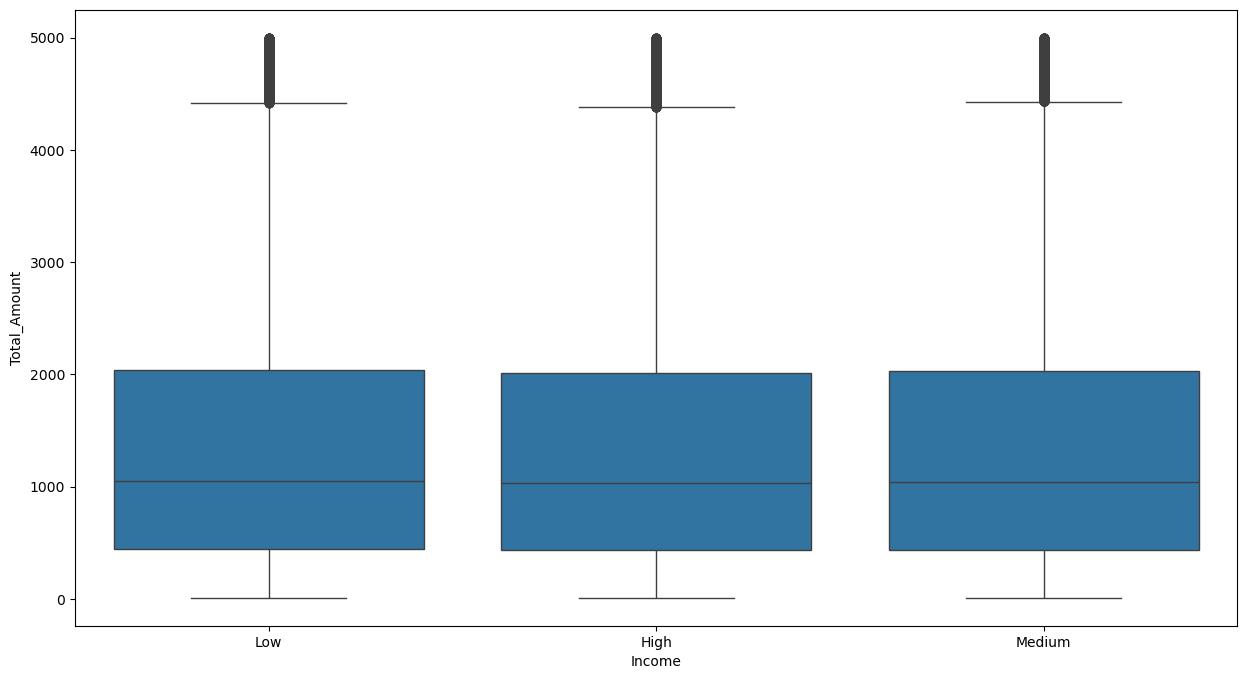

In [102]:
sns.boxplot( x= df['Income'], y = df['Total_Amount'])
plt.show()

Inference:

Higher income levels show greater variation in Total_Amount, with some outliers spending significantly more. Lower-income groups have more consistent and lower Total_Amount values. This suggests a proportional relationship between income and spending behavior.

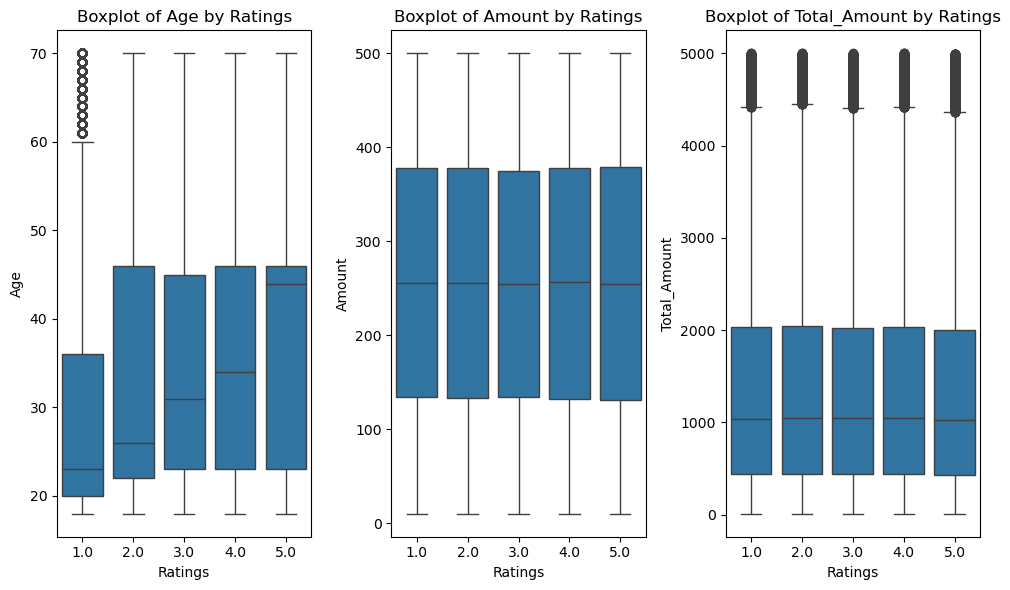

In [105]:
t=1
plt.figure(figsize=(10, 6))
for n in num:
    plt.subplot(1,3,t)
    sns.boxplot(x='Ratings', y=n, data=df)
    plt.title(f'Boxplot of {n} by Ratings')
    plt.ylabel(n)
    t+=1
plt.tight_layout()
plt.show()

Inference:

Age vs. Ratings:

* Higher ratings (4 and 5) are generally given by customers aged between 30-50.
Lower ratings (1 and 2) are more common among both younger (<30) and older (>60) age groups, suggesting different expectations across age demographics.

Amount (Transaction Value) vs. Ratings:

* Transactions with higher amounts tend to receive better ratings (4 and 5), indicating that customers spending more are generally more satisfied.
Low-rated transactions (1 and 2) often involve smaller amounts, possibly indicating dissatisfaction with lower-value products or poor perceived value.

Total_Amount (Cumulative Spend) vs. Ratings:

* Similar to Amount, high cumulative spenders show a strong association with positive ratings, indicating loyal customers are more satisfied.
Negative ratings are skewed towards customers with lower total spending.

### Cat vs Cat

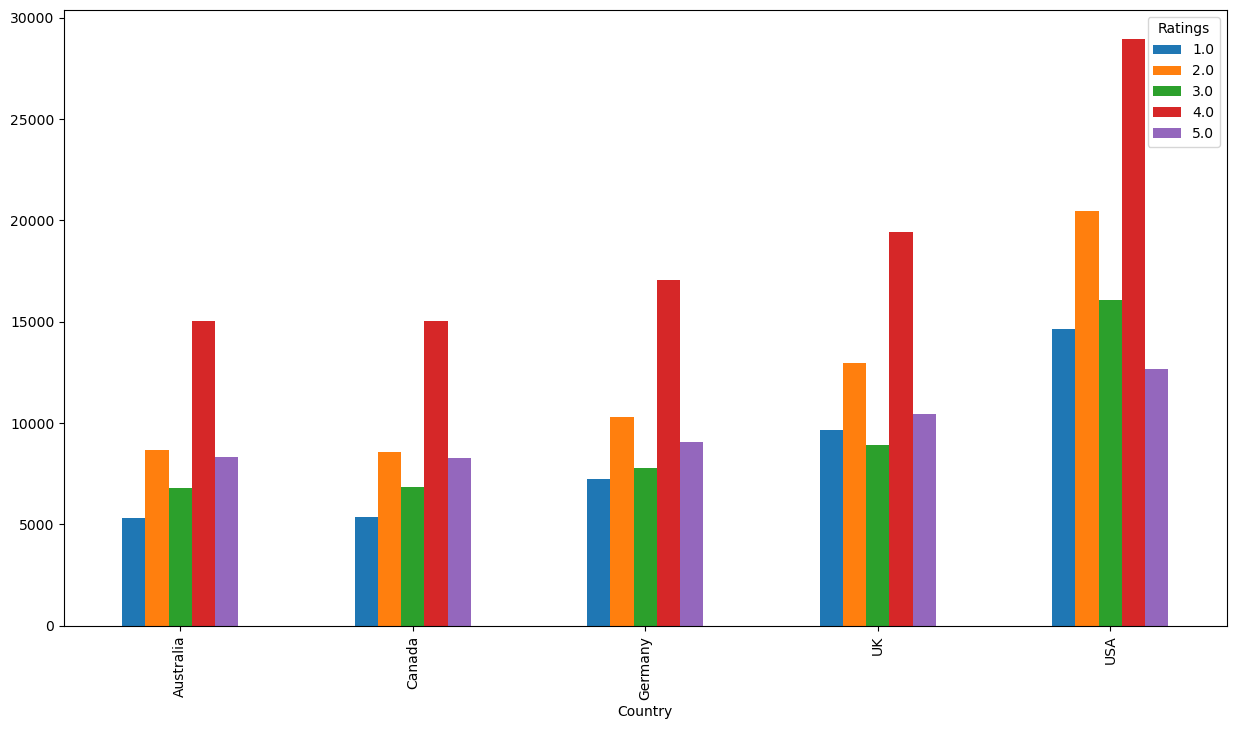

In [107]:
pd.crosstab(df['Country'],df['Ratings']).plot(kind = 'bar')
plt.show()

Inference:

The distribution of Ratings varies across different countries. Certain countries may have higher counts for specific ratings, reflecting differences in customer satisfaction or product reception. These insights can help localize strategies for customer engagement and satisfaction.

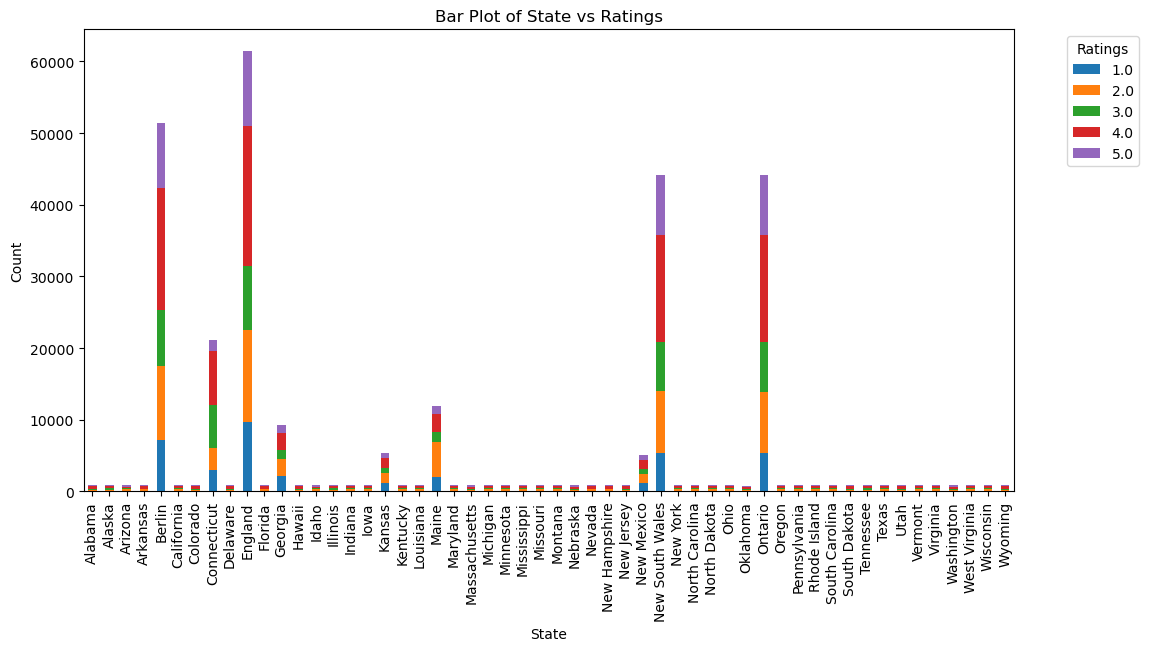

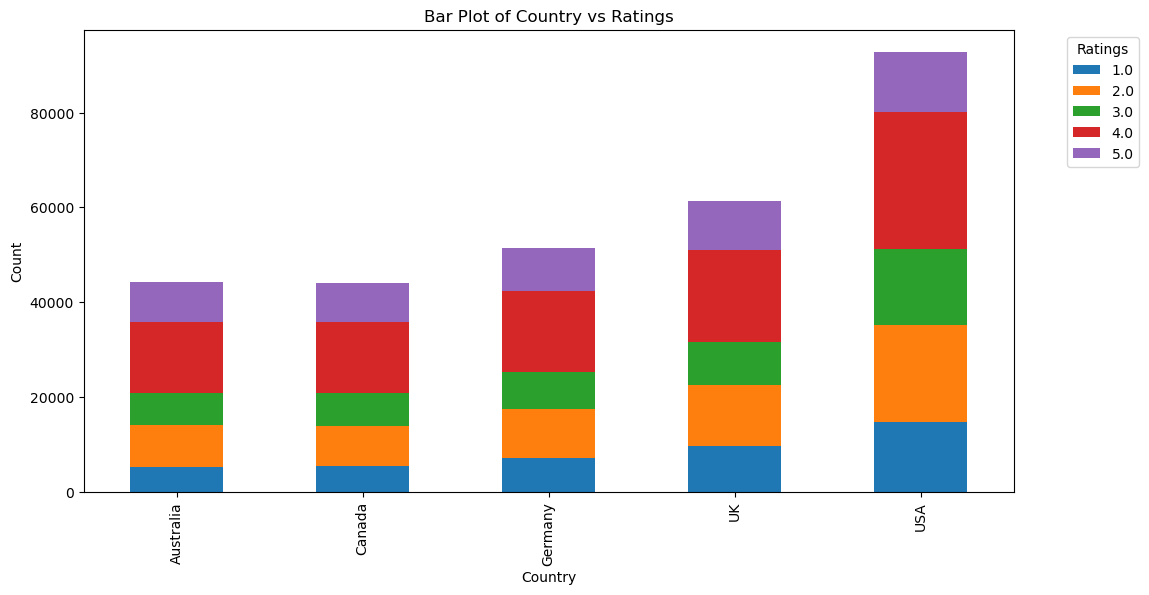

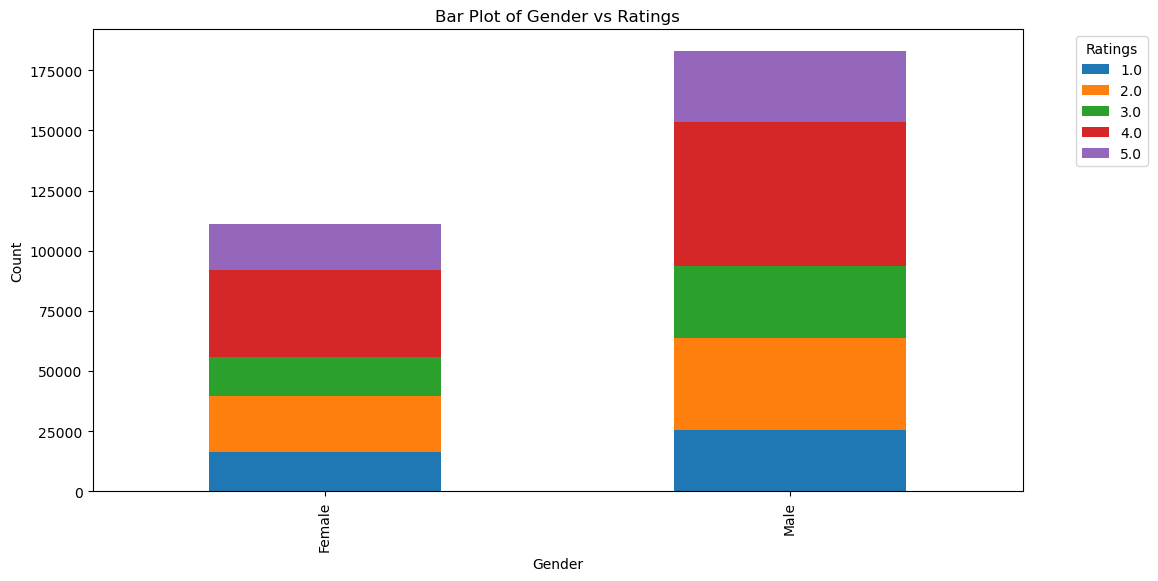

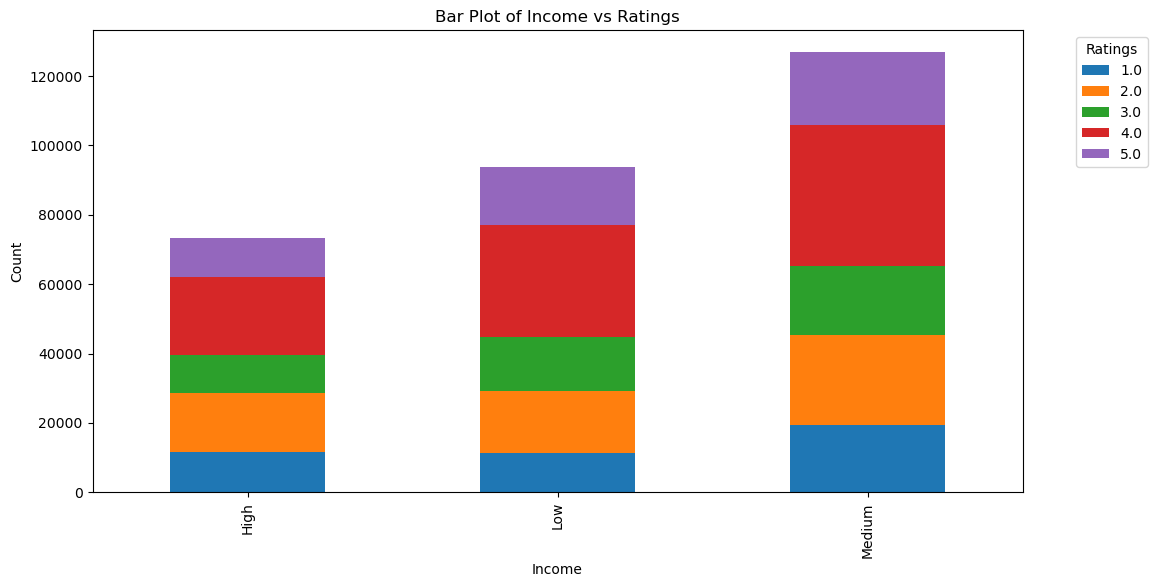

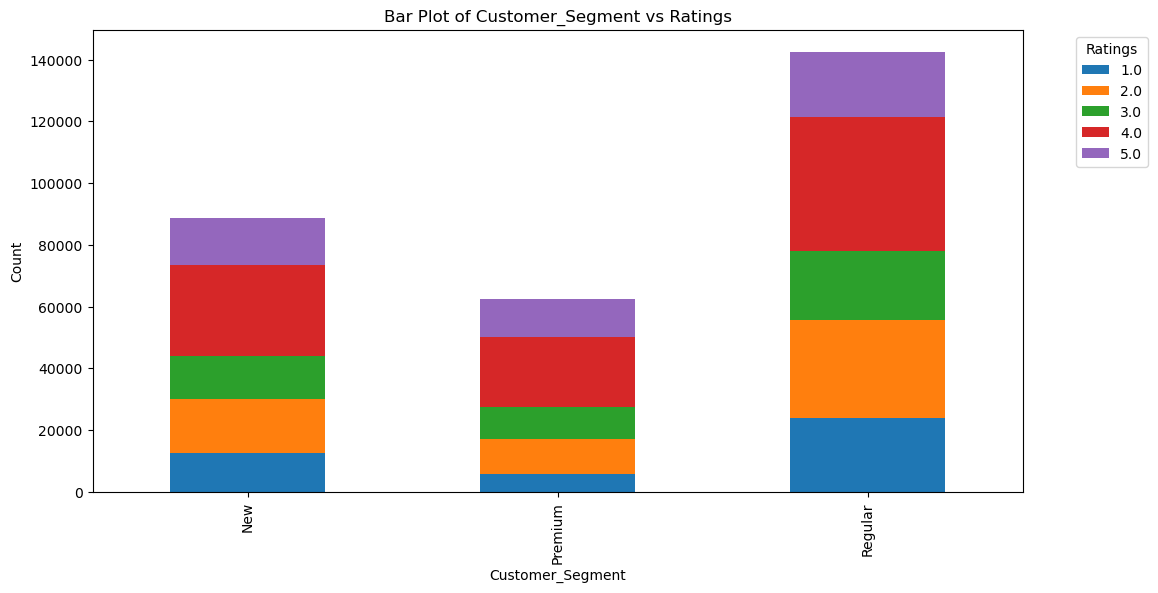

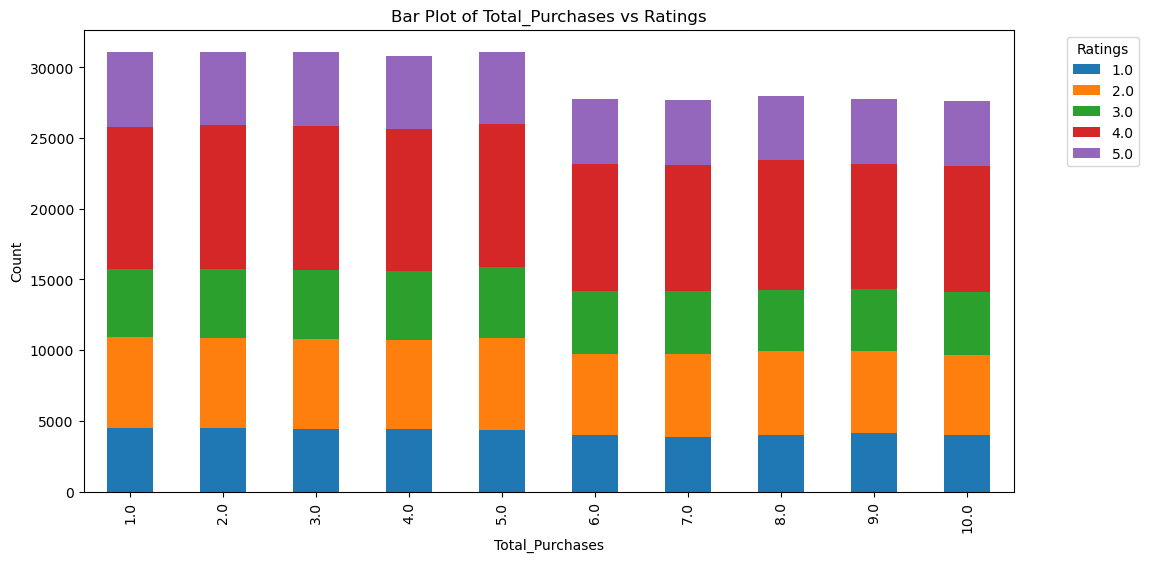

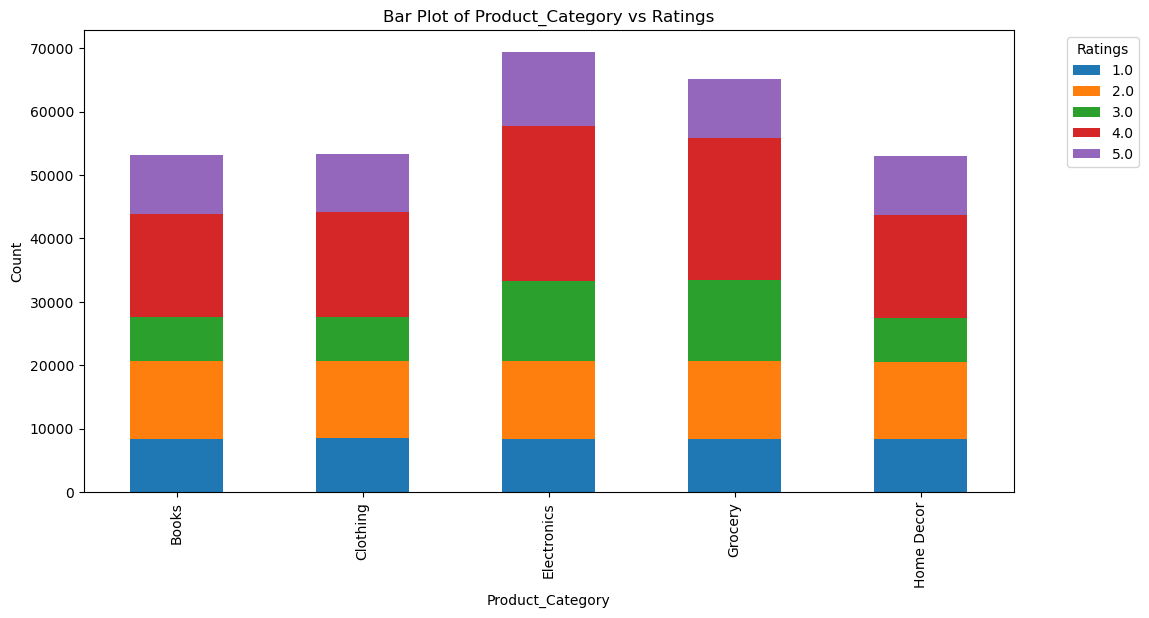

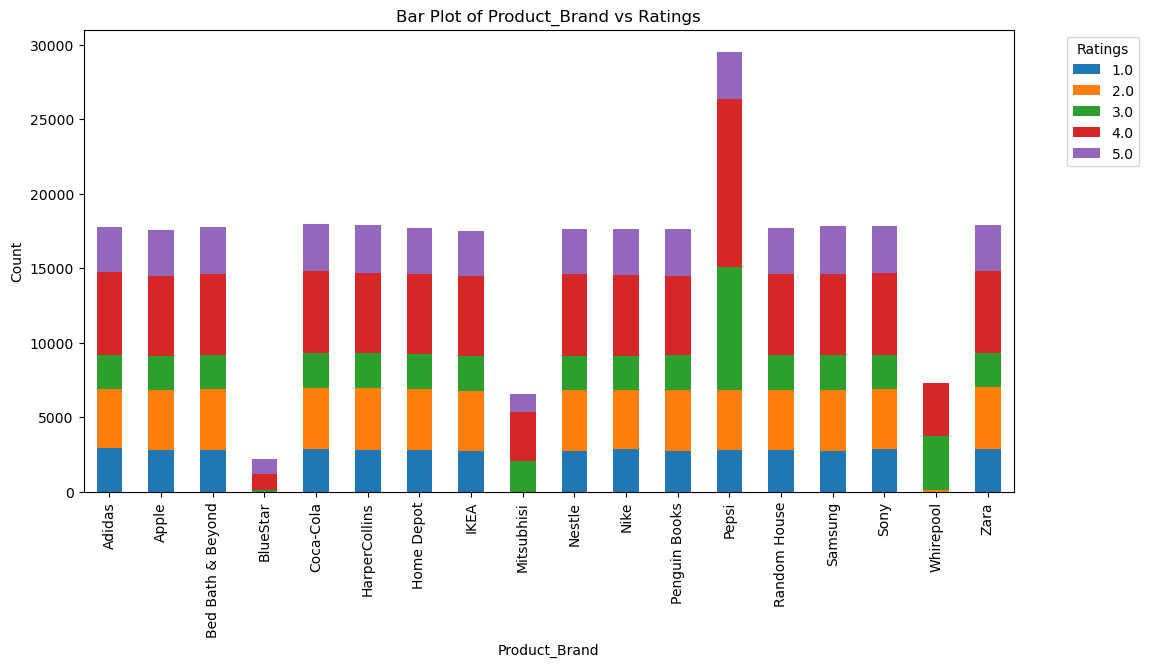

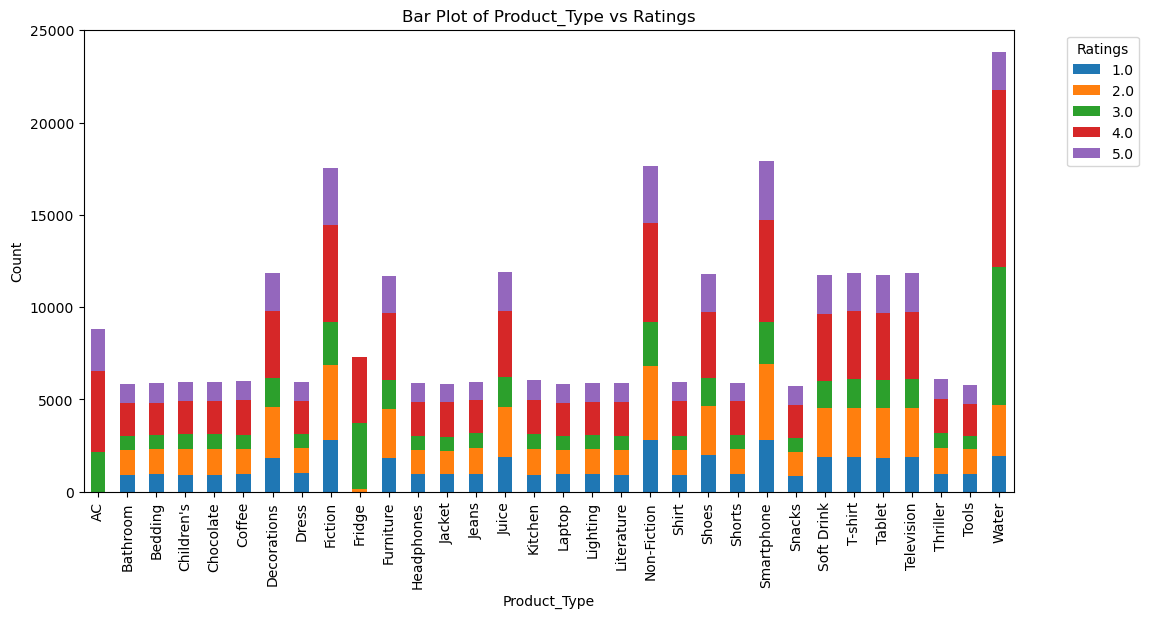

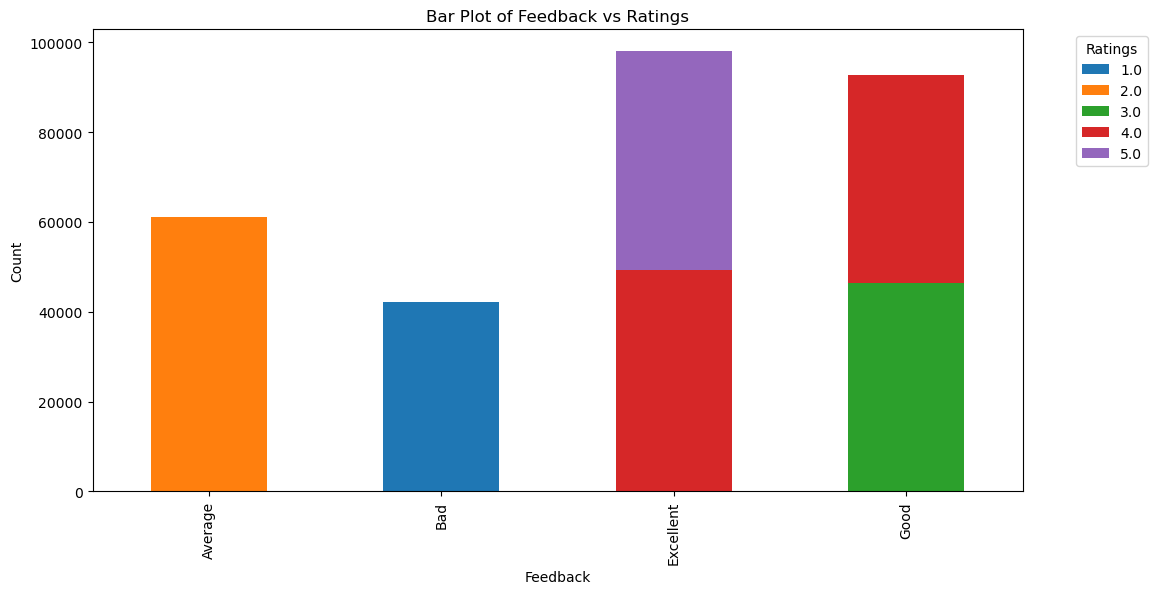

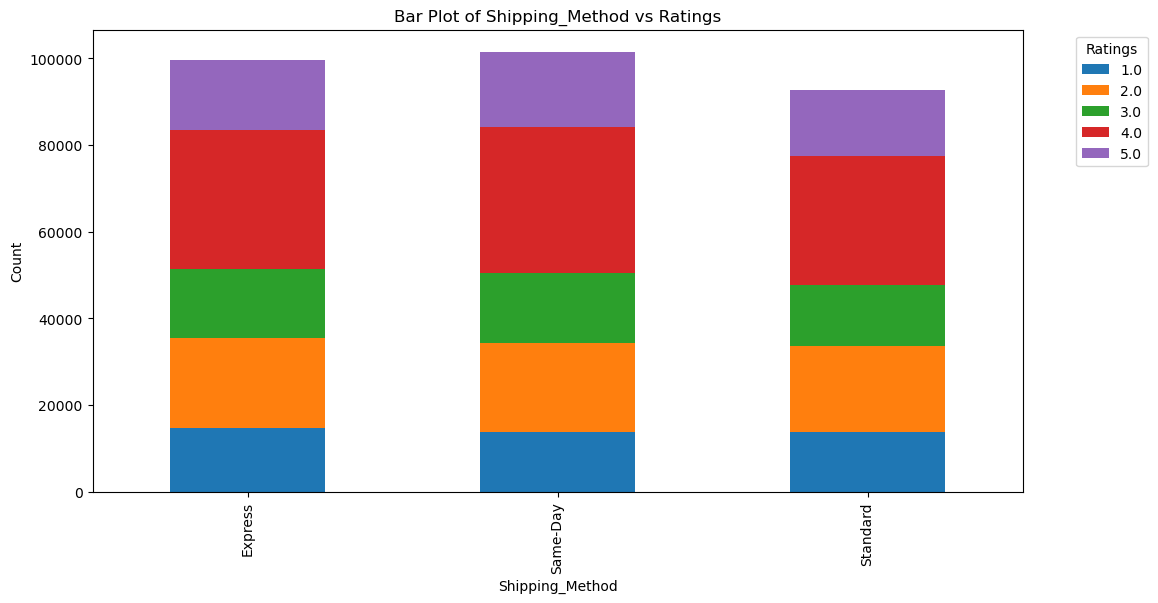

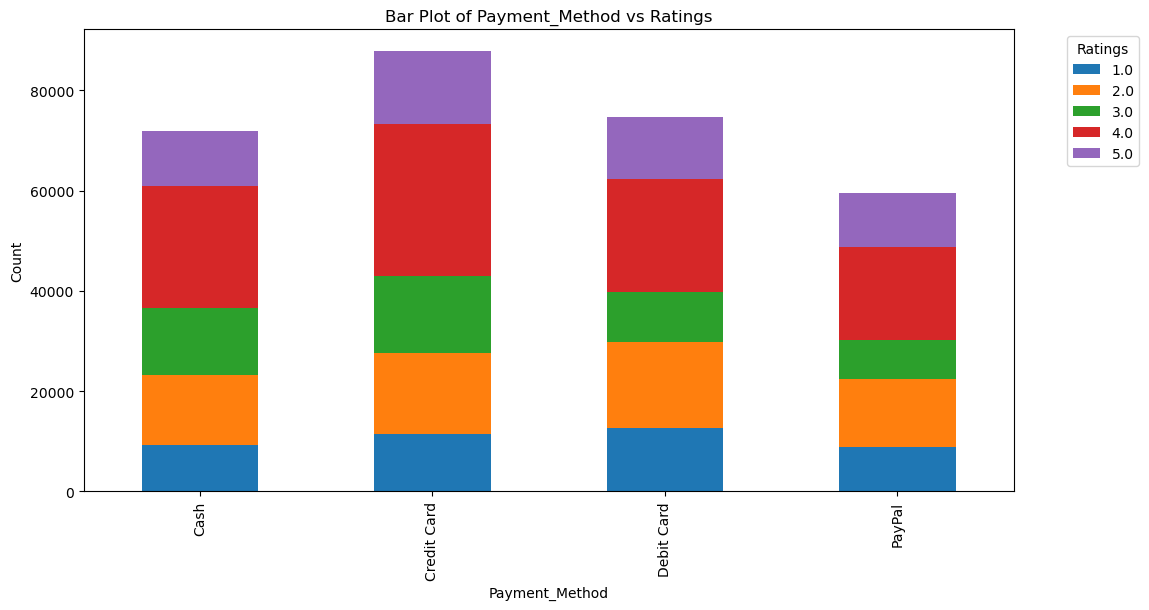

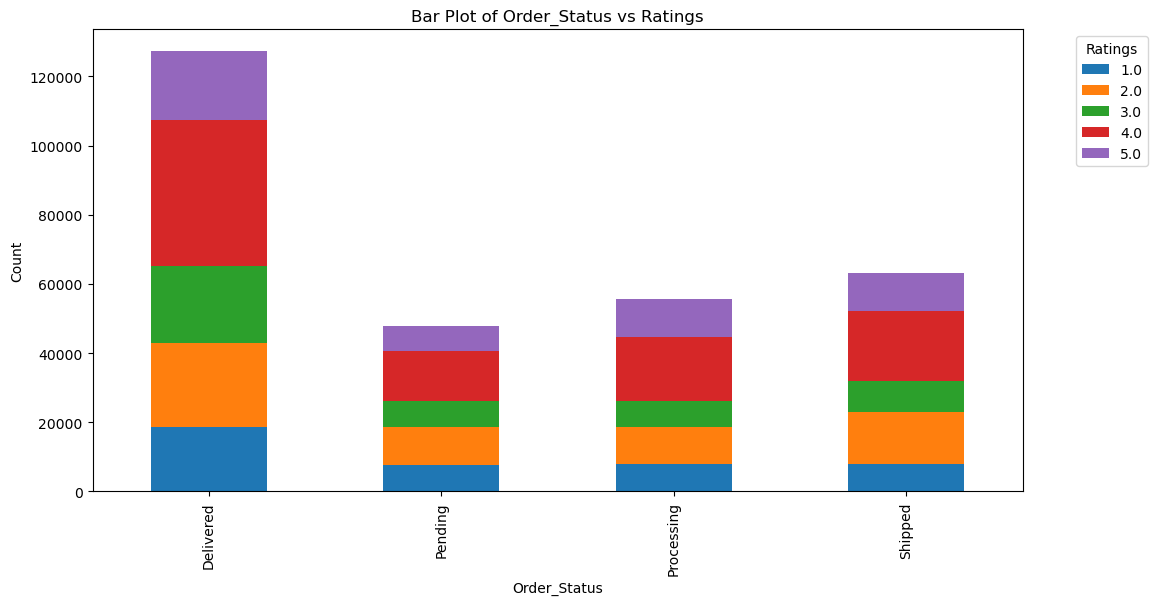

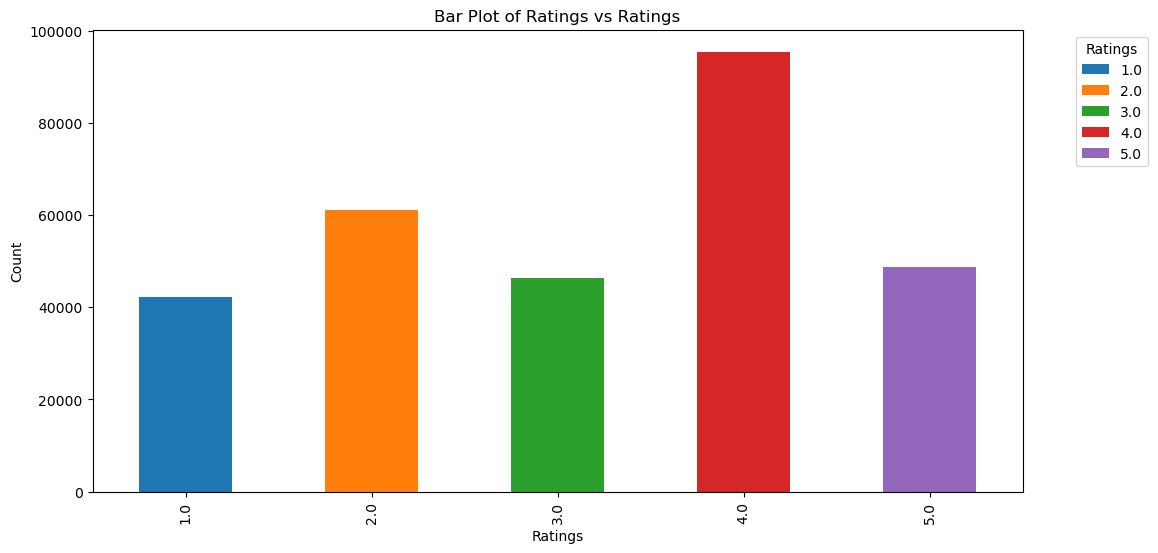

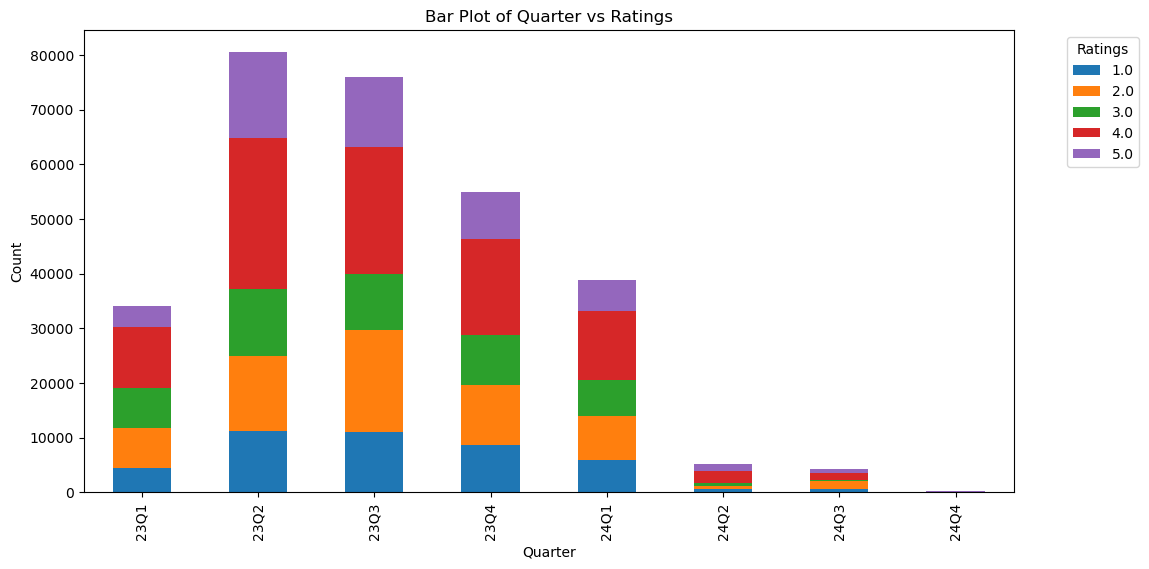

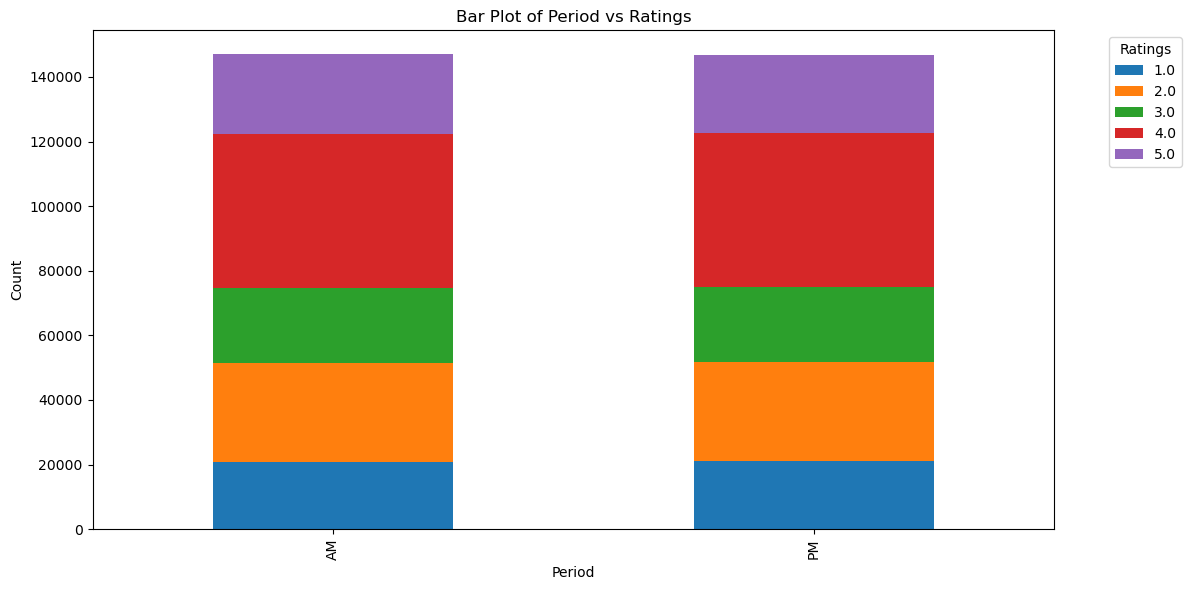

In [109]:

for i,c1 in enumerate(cat):
    if c1 != 'products':
        crosstab = pd.crosstab(df[c1], df['Ratings'])
        crosstab.plot(kind='bar', figsize=(12, 6), stacked=True)
        plt.title(f'Bar Plot of {c1} vs Ratings')
        plt.xlabel(c1)
        plt.ylabel('Count')
        plt.legend(title='Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

Inference:

Total Purchases vs. Ratings:

* Customers with more purchases tend to give higher ratings, showing that repeat buyers are generally happier.
First-time or infrequent buyers exhibit a broader spread in ratings, including more low ratings.

Gender vs. Ratings:

* Both genders show similar patterns, though female customers slightly lean towards higher ratings.

Customer Segment vs. Ratings:

* Premium customers are more likely to give 4 and 5 star ratings.
Standard or Basic segments show more variability, with a significant portion of lower ratings.

Product Category vs. Ratings:

* Electronics and Home Decor products generally receive higher ratings.
Books and Grocery have a higher proportion of lower ratings, possibly indicating quality or value concerns.

Product Brand vs. Ratings:

* Strong brands like Nike and Samsung attract better ratings.
Lesser-known brands have more variability in customer satisfaction.

Feedback vs. Ratings:

* Direct alignment: “Excellent” feedback maps to 4-5 stars, while “Bad” feedback correlates with 1-2 stars.

Shipping Method vs. Ratings:

* Same-Day shipping positively impacts ratings.
Standard and delayed shipping lead to more negative reviews, highlighting delivery time as a critical factor in customer satisfaction.

Payment Method vs. Ratings:

* Minimal variation, but Credit Card and PayPal users lean towards higher ratings.
Cash transactions show more variability, possibly tied to purchase type or region.

Order Status vs. Ratings:

* Orders marked "Shipped" or "Completed" attract positive reviews.
"Cancelled" or "Returned" orders are heavily skewed towards 1-star ratings.

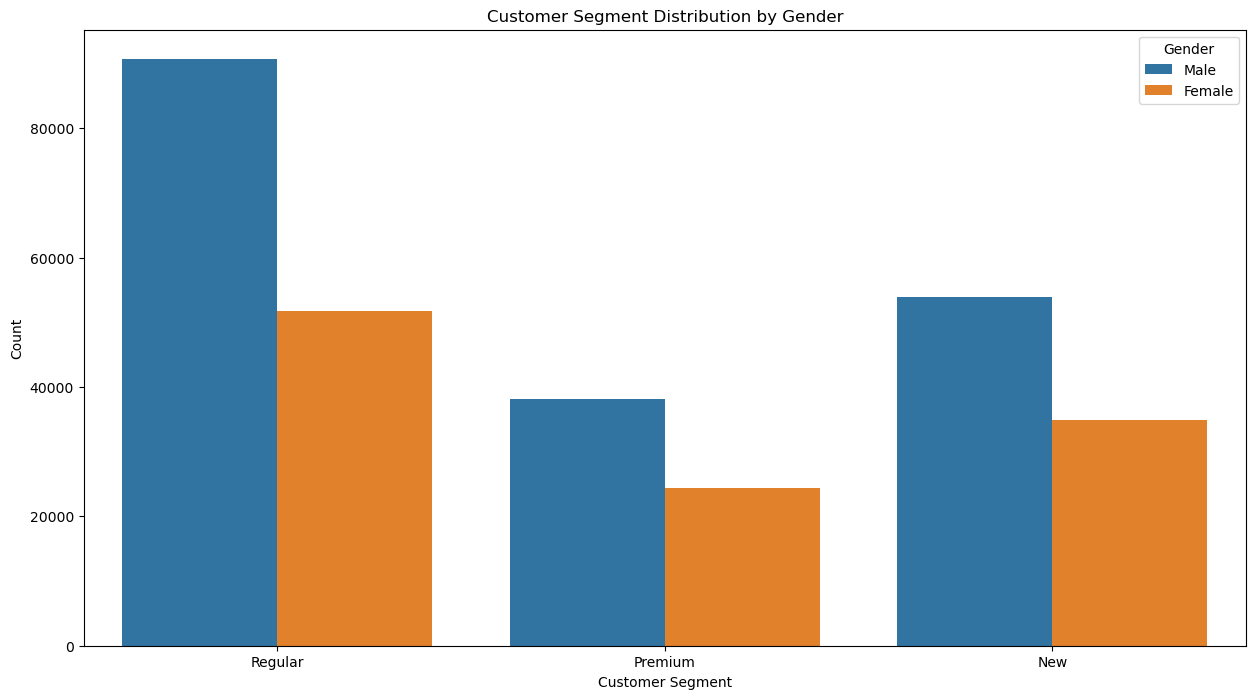

In [113]:
sns.countplot(x='Customer_Segment', hue='Gender', data=df)
plt.title('Customer Segment Distribution by Gender')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

Infernce:

The distribution of Customer_Segment differs by gender, with some segments being more gender-balanced than others. Certain customer segments may be dominated by one gender, reflecting differing preferences or shopping behaviors. Understanding these dynamics can support tailored marketing campaigns and product recommendations.

### Multivariate analysis

  * Multi variate analysis:
            * Num vs Num vs Cat
                    1. Plot:
                            scatterplot(x,y,hue)
            * Num vs Cat vs Cat
                    1. Plot:
                            Boxplot(x,y,hue)

### Num vs Num vs Cat

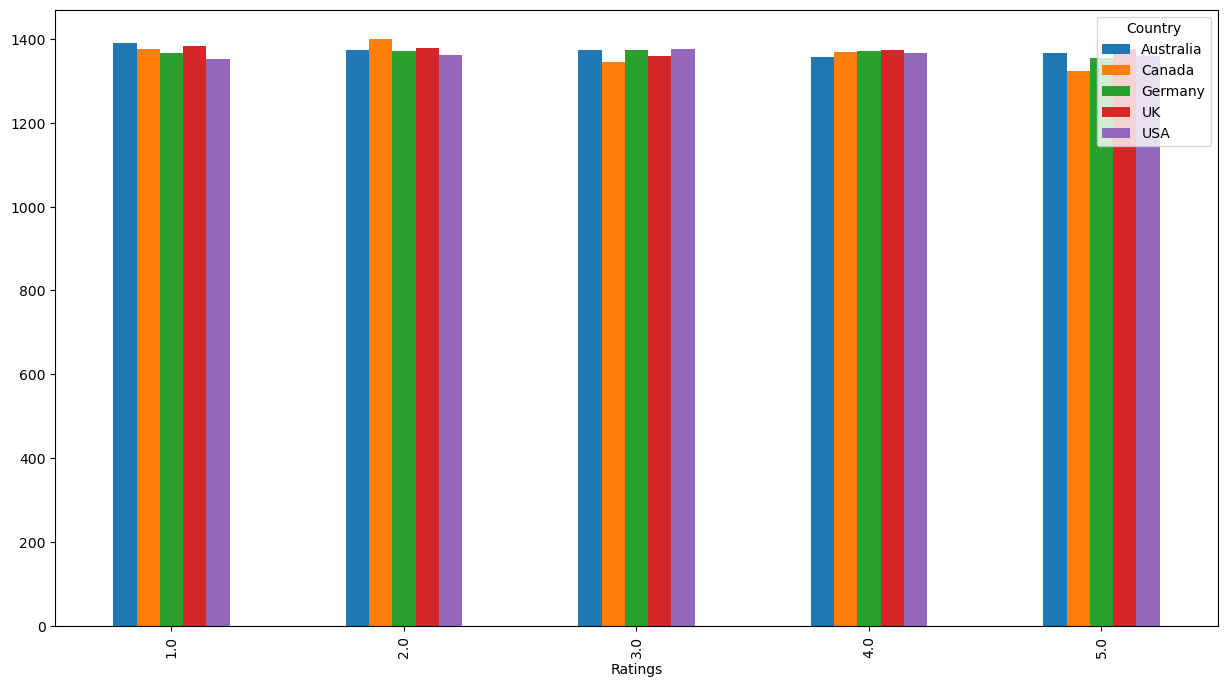

In [115]:
pd.crosstab(index=df['Ratings'],columns=df['Country'],values=df['Total_Amount'],aggfunc='mean').plot(kind='bar')
plt.show()

<Axes: xlabel='Ratings', ylabel='Amount'>

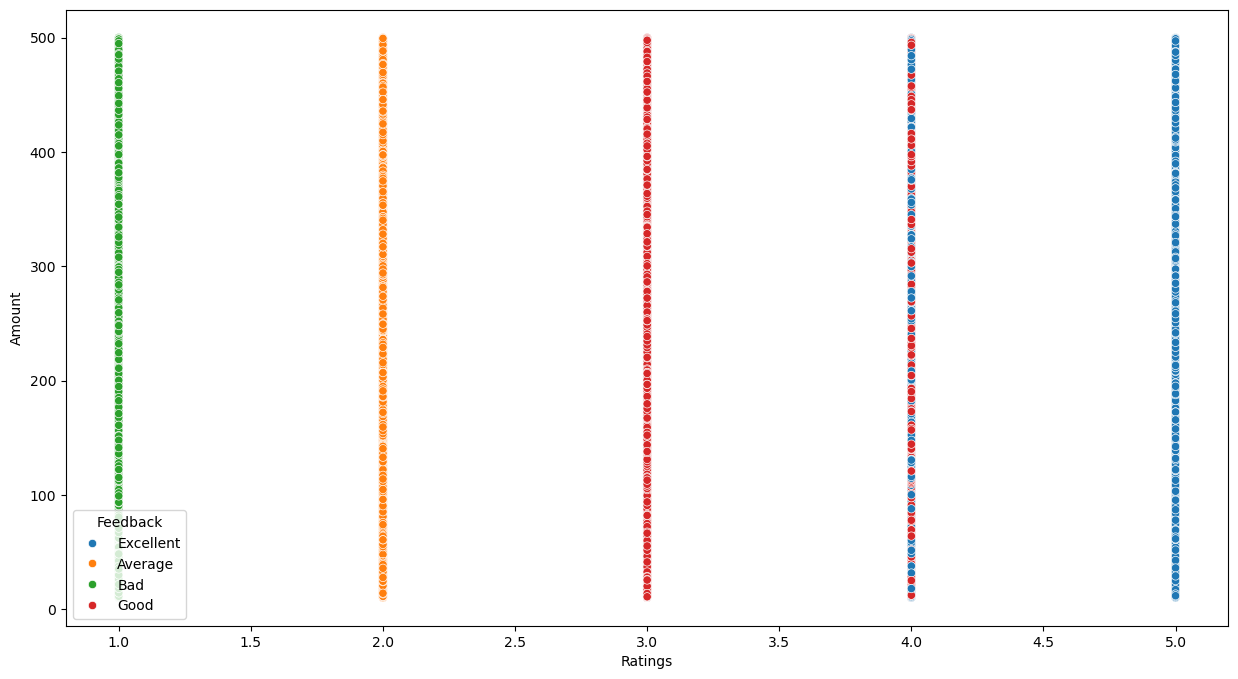

In [111]:
sns.scatterplot(x=df['Ratings'],y=df['Amount'],hue=df['Feedback'])

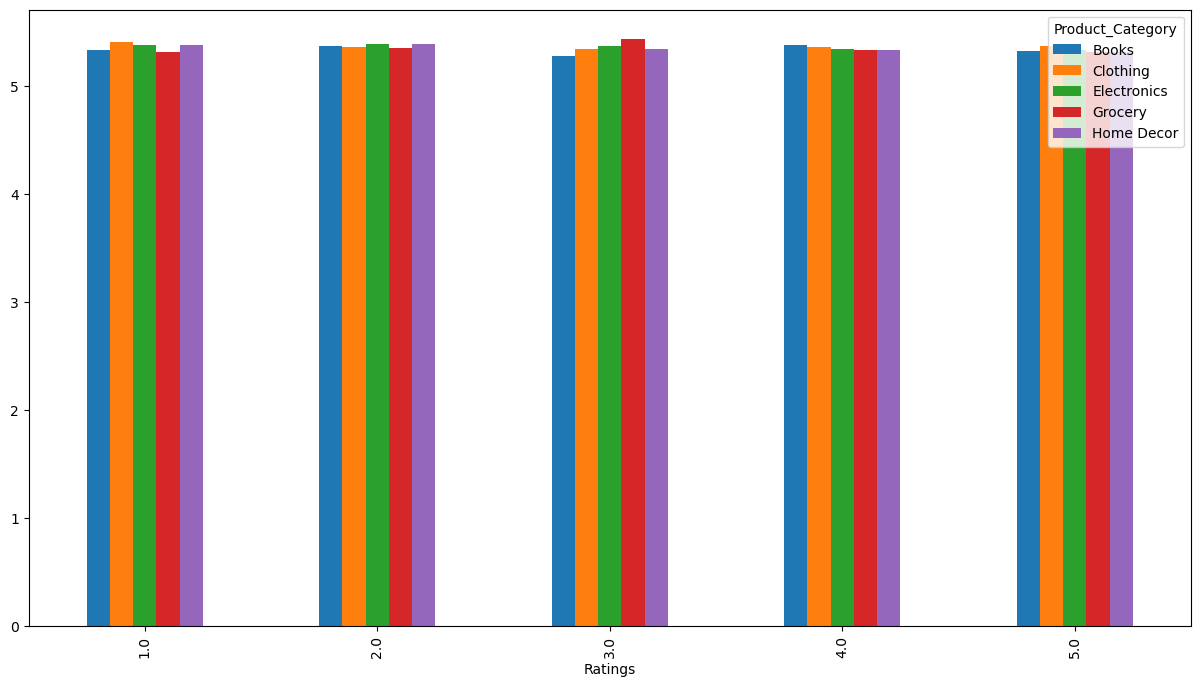

In [117]:
pd.crosstab(index=df['Ratings'],columns=df['Product_Category'],values=df['Total_Purchases'],aggfunc='mean').plot(kind='bar')
plt.show()

Purchase frequency is driven more by product category than customer rating. 
Some categories are inherently purchased more often, with ratings having little impact on average purchase numbers,
though there's a slight dip at the highest rating for some.

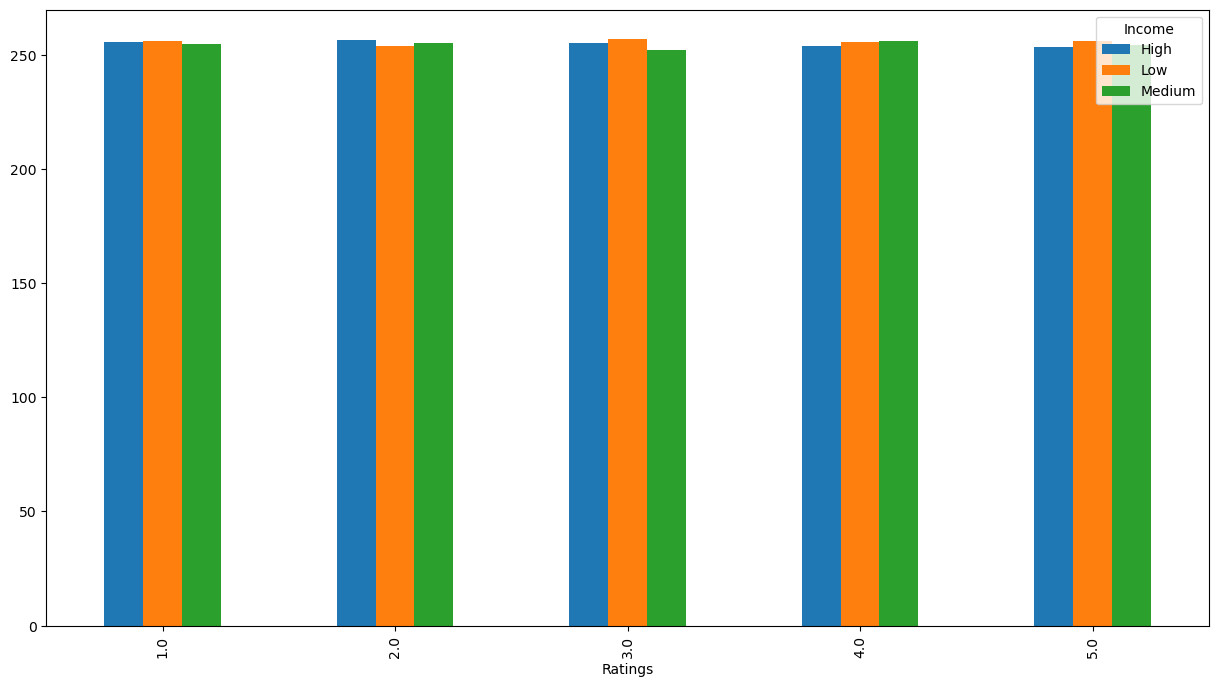

In [120]:
pd.crosstab(index=df['Ratings'],columns=df['Income'],values=df['Amount'],aggfunc='mean').plot(kind='bar')
plt.show()

Customer spending is primarily driven by income, with higher income levels consistently leading to higher average spending. Ratings have negligible impact on spending, as the average amount spent remains similar across all ratings within each income group.

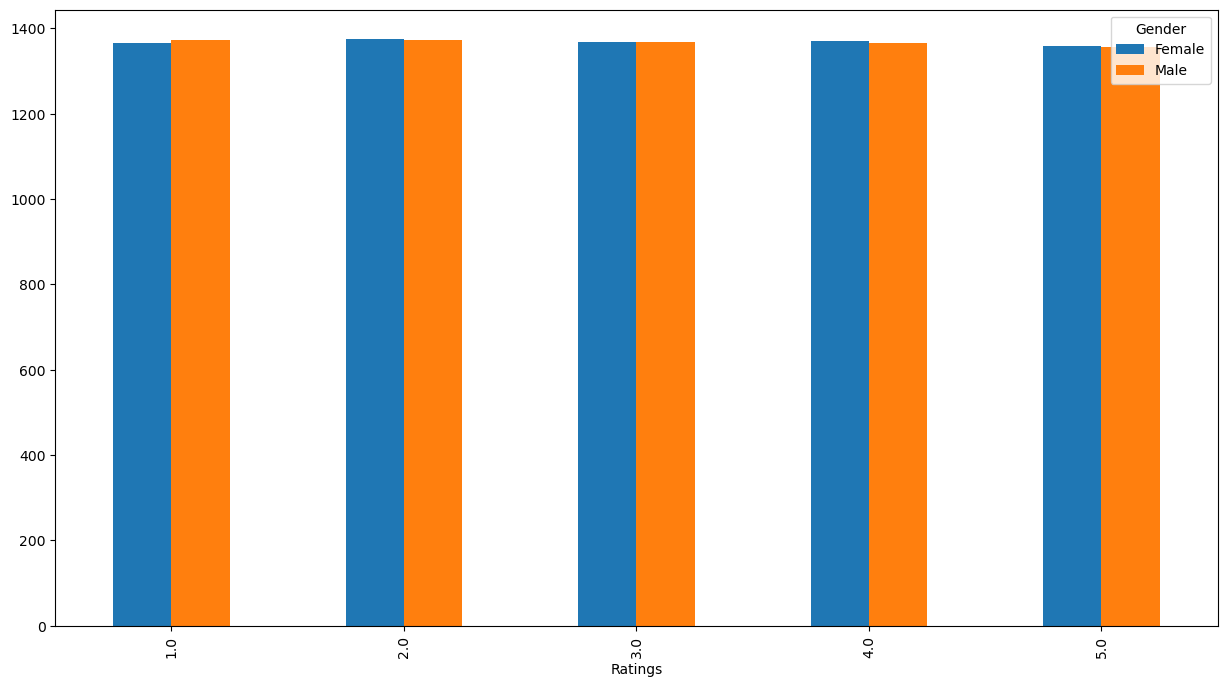

In [123]:
pd.crosstab(index=df['Ratings'],columns=df['Gender'],values=df['Total_Amount'],aggfunc='mean').plot(kind='bar')
plt.show()

Overall, the plot indicates that the average amount spent is consistent across genders for each rating, pointing to an equitable spending pattern between Female and Male customers.

<Axes: xlabel='Ratings', ylabel='Total_Amount'>

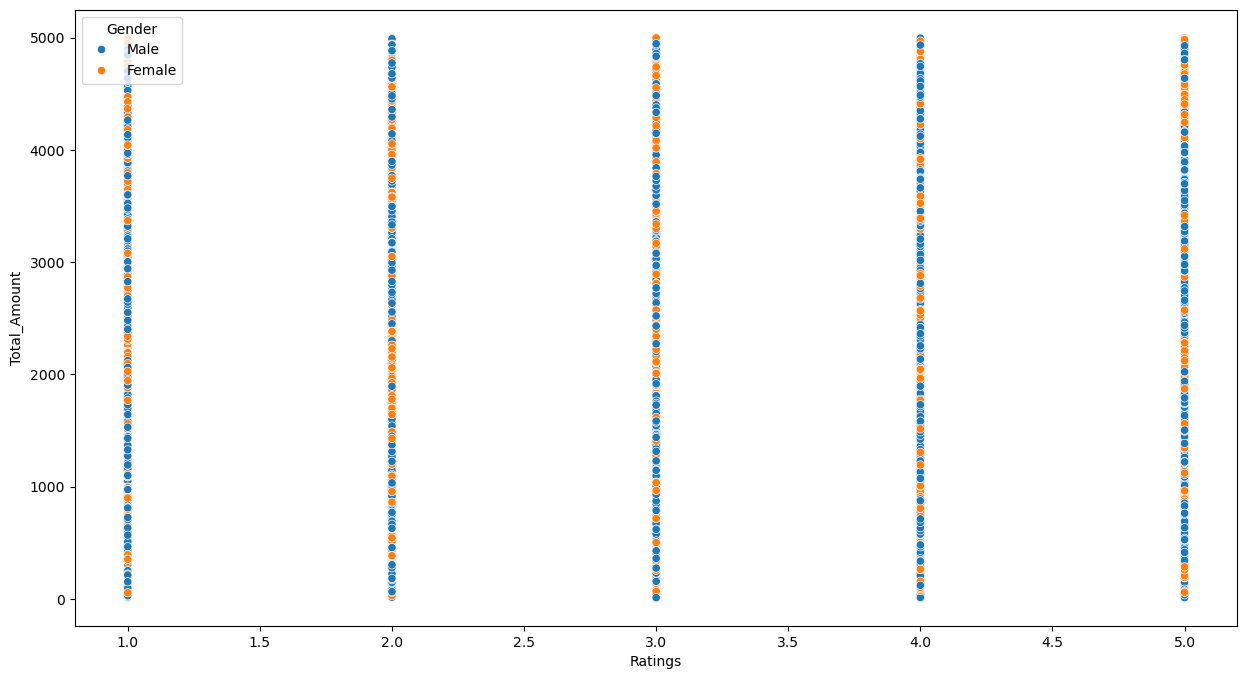

In [126]:
sns.scatterplot(x=df['Ratings'],y=df['Total_Amount'],hue=df['Gender'])

Distribution of Ratings: The ratings range from 1 to 5. Each rating value has a vertical line of data points, indicating that multiple individuals have given each rating.

Total Amount Spread: The Total_Amount values range from 0 to 5000 for each rating. There is no clear trend or correlation between Ratings and Total_Amount.

Gender Comparison: Both genders are represented across all ratings and Total_Amount values. There is no visible difference in the distribution of Total_Amount between males and females for any given rating.

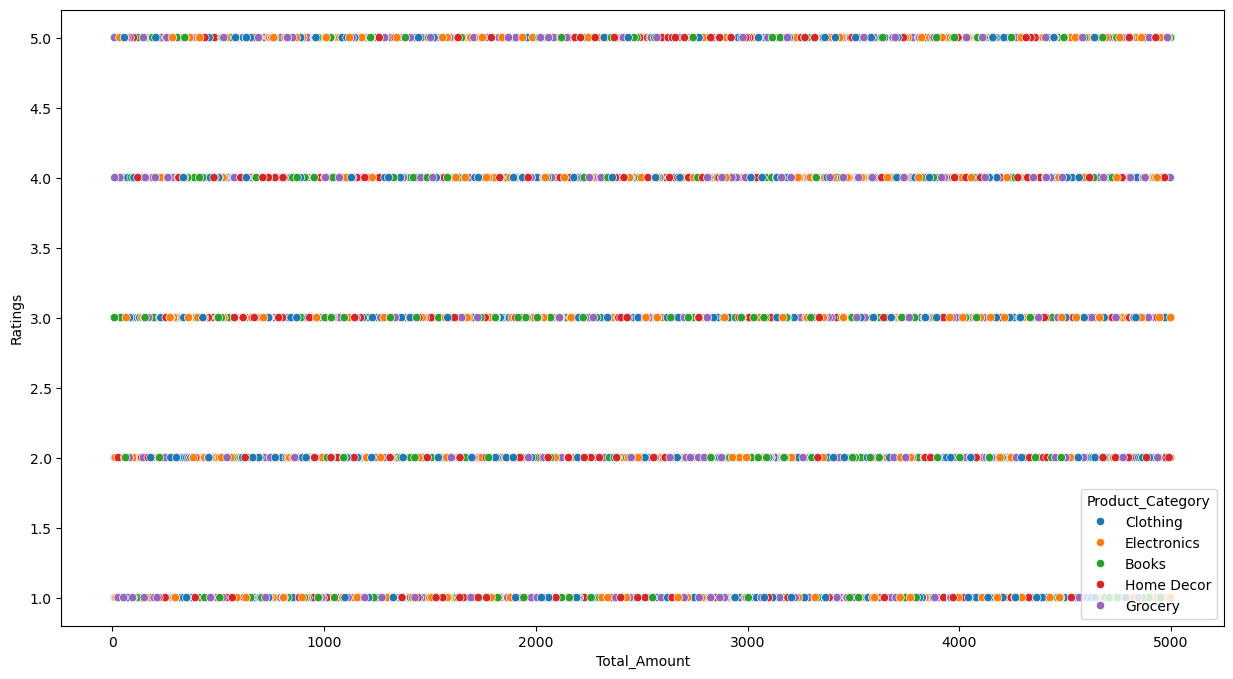

In [129]:
sns.scatterplot(x=df['Total_Amount'],y=df['Ratings'],hue=df['Product_Category'])
plt.show()

Overall, this scatter plot provides a visual representation of how customer ratings are distributed across different spending amounts and product categories. It helps in understanding customer satisfaction and spending patterns.

### Num vs Cat vs Cat

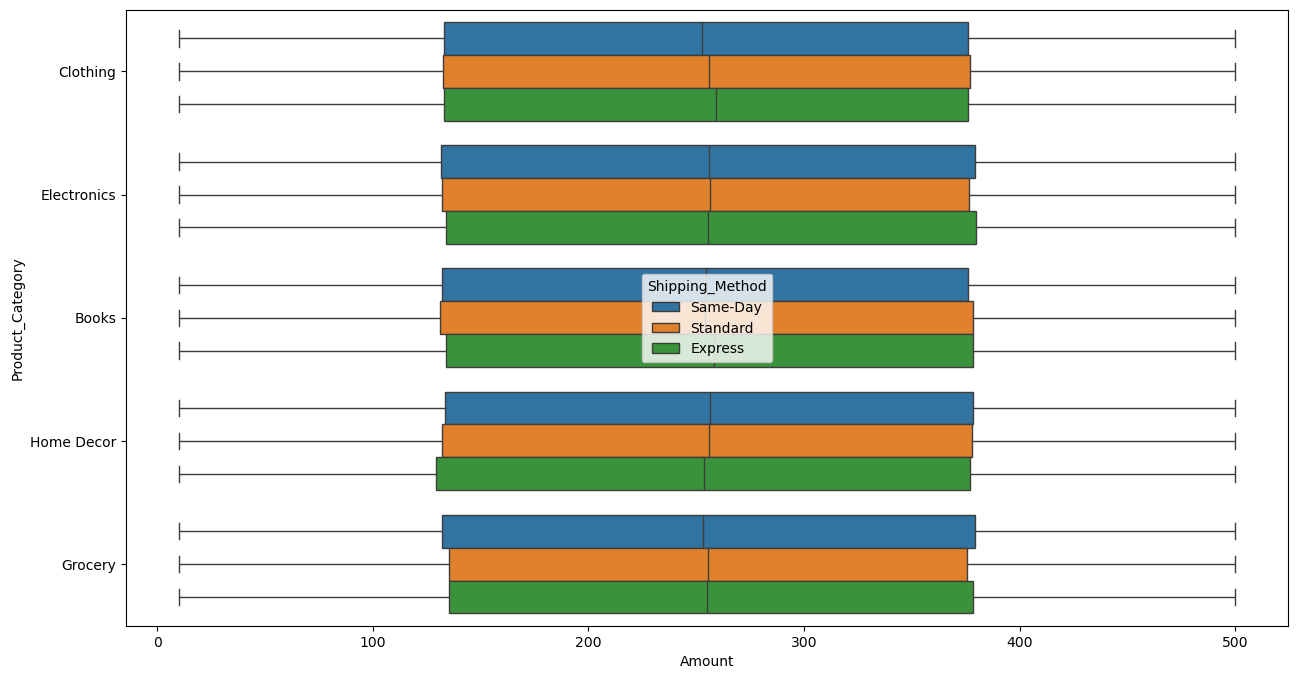

In [131]:
sns.boxplot(x=df['Amount'],y=df['Product_Category'],hue=df['Shipping_Method'])
plt.show()

Product category significantly impacts purchase amount, with electronics generally having the highest. Express shipping tends to correlate with higher amounts across most categories, though the effect varies

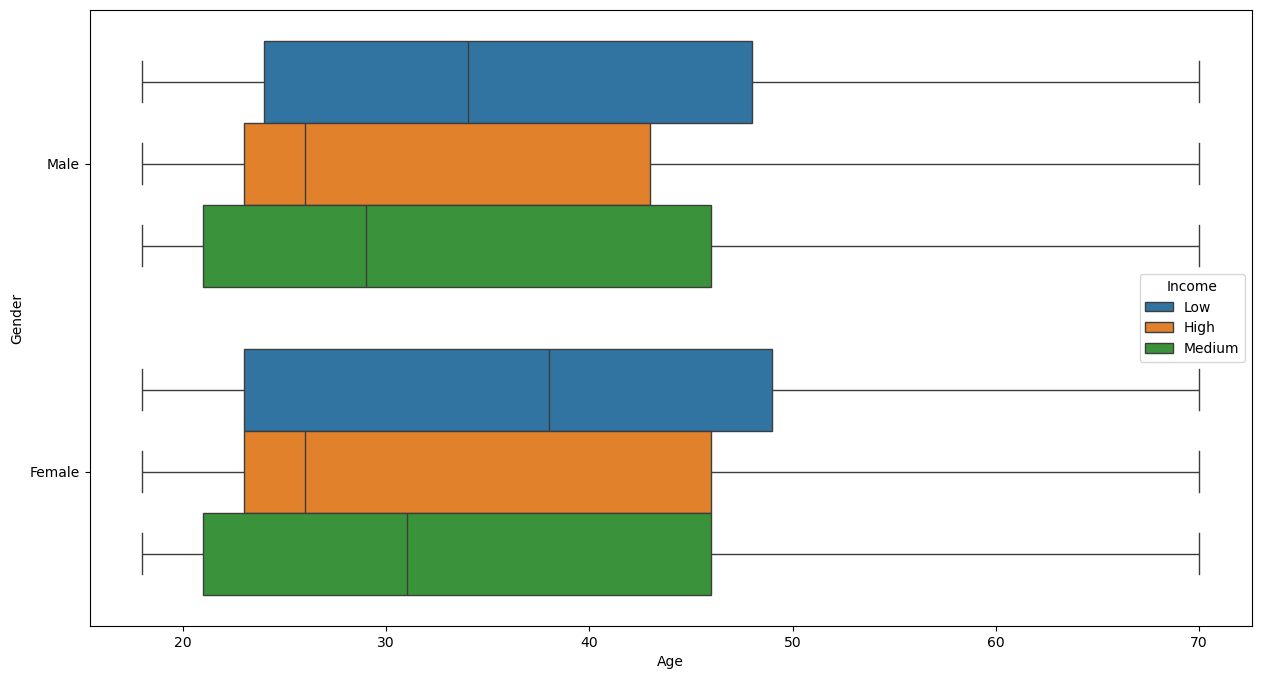

In [133]:
sns.boxplot(x=df['Age'],y=df['Gender'],hue=df['Income'])
plt.show()

Higher income individuals tend to be older, but age alone doesn't fully determine income. There's a significant overlap in age across income levels for both genders.

Age Distribution by Gender and Income:

Male:

Low Income: The age range is approximately from 20 to 70, with the interquartile range (IQR) roughly between 30 and 50.

High Income: The age range is approximately from 20 to 60, with the IQR roughly between 30 and 45.

Medium Income: The age range is approximately from 20 to 70, with the IQR roughly between 25 and 50.

Female:

Low Income: The age range is approximately from 20 to 70, with the IQR roughly between 30 and 50.

High Income: The age range is approximately from 20 to 60, with the IQR roughly between 30 and 45.

Medium Income: The age range is approximately from 20 to 70, with the IQR roughly between 25 and 50.

Comparison between Genders:

Both males and females have similar age distributions across different income levels.

The IQRs for both genders are quite similar, indicating that the central 50% of ages for each income level are comparable between males and females.

Income Level Insights:

For both genders, the Low and Medium income levels have a wider age range compared to the High income level.

The High income level has a slightly narrower age range, indicating that individuals with high income tend to be within a more specific age range.

<Axes: xlabel='Ratings', ylabel='Shipping_Method'>

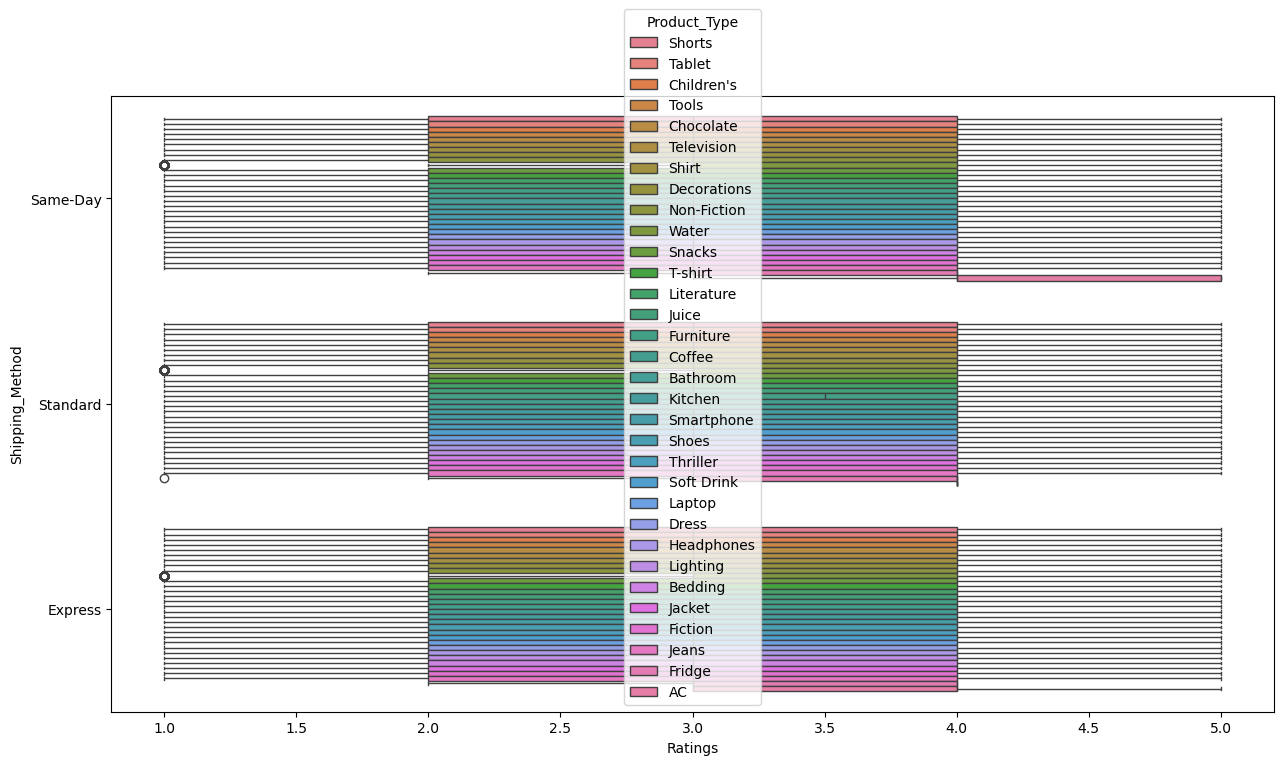

In [135]:
sns.boxplot(x=df['Ratings'],y=df['Shipping_Method'],hue=df['Product_Type'])

Product type has a greater influence on ratings than shipping method.
Most ratings are between 2 and 4, with some products consistently receiving higher or lower scores regardless of shipping.

<Axes: xlabel='Ratings', ylabel='Country'>

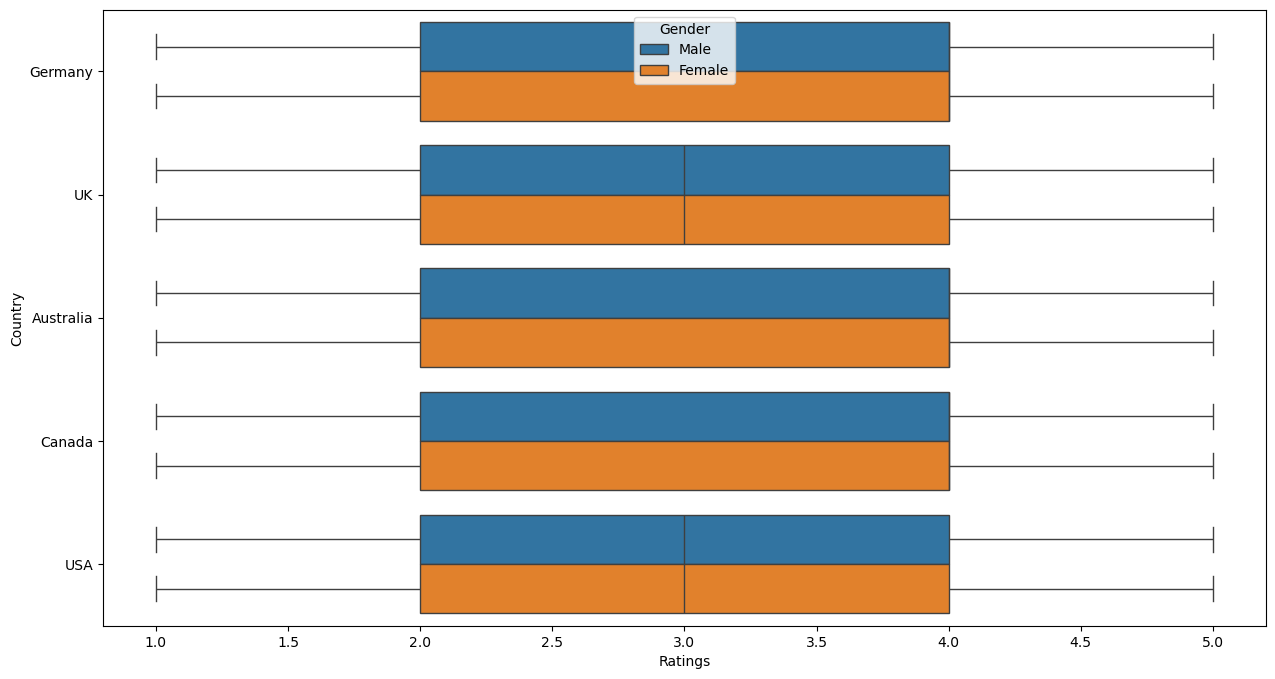

In [137]:
sns.boxplot(x=df['Ratings'],y=df['Country'],hue=df['Gender'])

Customer ratings are similar across all countries and genders shown, with medians around 3 and minimal differences in distribution.

### SIGNIFICANCE TESTING

In [139]:
df_ana=df.copy()

In [141]:
cat_a=df_ana.select_dtypes(exclude=np.number).columns.tolist()

In [143]:
num_a=df_ana.select_dtypes(include=np.number).columns.tolist()

### CATEGORICAL SIGNIFICANCE TESTING

In [146]:
import scipy.stats as stats
q=[]
for i in cat_a:
    c=df[i]
    w=c.name
    
# Create contingency table
    contingency_table = pd.crosstab(df['Ratings'], c )
# Perform the Chi-Square Test of Independence
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Determine significance
    alpha = 0.05
    if p < alpha:
        print("The",w," is significantly associated (reject the null hypothesis).")
        q.append(w)
    else:
        print("The ",w," are not significantly associated (fail to reject the null hypothesis).")

The State  is significantly associated (reject the null hypothesis).
The Country  is significantly associated (reject the null hypothesis).
The Gender  is significantly associated (reject the null hypothesis).
The Income  is significantly associated (reject the null hypothesis).
The Customer_Segment  is significantly associated (reject the null hypothesis).
The  Total_Purchases  are not significantly associated (fail to reject the null hypothesis).
The Product_Category  is significantly associated (reject the null hypothesis).
The Product_Brand  is significantly associated (reject the null hypothesis).
The Product_Type  is significantly associated (reject the null hypothesis).
The Feedback  is significantly associated (reject the null hypothesis).
The Shipping_Method  is significantly associated (reject the null hypothesis).
The Payment_Method  is significantly associated (reject the null hypothesis).
The Order_Status  is significantly associated (reject the null hypothesis).
The Ratin

In [148]:
print('The catagorical significant varibles are as follows -',q)

The catagorical significant varibles are as follows - ['State', 'Country', 'Gender', 'Income', 'Customer_Segment', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products', 'Quarter']


### NUMERICAL SIGNIFICANCE TESTING

In [150]:
d=[]
for i in num_a:
    s=i
# Perform ANOVA
    anova_result = stats.f_oneway(df[df['Ratings'] == 1.0 ][s],
                                  df[df['Ratings'] == 2.0 ][s],
                                  df[df['Ratings'] == 3.0 ][s],
                                  df[df['Ratings'] == 4.0 ][s],
                                  df[df['Ratings'] == 5.0 ][s])
# Determine significance
    alpha = 0.05
    if anova_result.pvalue < alpha:
        print("The variable",s," are significantly different (reject the null hypothesis).")
        d.append(s)
    else:
        print("The variable",s," are not significantly different (fail to reject the null hypothesis).")


The variable Age  are significantly different (reject the null hypothesis).
The variable Amount  are not significantly different (fail to reject the null hypothesis).
The variable Total_Amount  are not significantly different (fail to reject the null hypothesis).


In [152]:
print('The numerical significant varibles are as follows -',d)

The numerical significant varibles are as follows - ['Age']


#### Removing insignificant columns

In [154]:
df=df.drop(columns=['Total_Purchases','Period','Amount','Total_Amount'])

### ENCODING

In [156]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

### Ordinal encoding:

### Quarter ordinal encoding

In [158]:
ordin=OrdinalEncoder(categories=[['23Q1','23Q2','23Q3','23Q4','24Q1','24Q2','24Q3','24Q4' ]], dtype= int ) 
df['Quarter']= ordin.fit_transform(df[['Quarter']])
df['Quarter']=df['Quarter']

### Income ordinal encoding

In [160]:
df['Income'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [162]:
o=OrdinalEncoder(categories=[[ 'Low','Medium', 'High']])
df['Income']=o.fit_transform(df[['Income']])

### Feedback ordinal encoding

In [164]:
ord=OrdinalEncoder(categories=[['Bad','Average','Good','Excellent']])
df['Feedback']= ord.fit_transform(df[['Feedback']])

### Order status encoding

In [166]:
df['Order_Status'].unique()

array(['Shipped', 'Processing', 'Pending', 'Delivered'], dtype=object)

In [168]:
ordi=OrdinalEncoder(categories=[['Pending', 'Processing','Shipped', 'Delivered' ]])
df['Order_Status']= ordi.fit_transform(df[['Order_Status']])

In [170]:
df['Order_Status'].unique()

array([2., 1., 0., 3.])

### Month encoding

### N-1 dummy encoding:

### Gender dummy encoding

In [172]:
df=pd.get_dummies(data=df,columns=['Gender'],drop_first=True, dtype=int)
df

,State,Country,Age,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Quarter,Gender_Male
0,Berlin,Germany,21.0,0.0,Regular,Clothing,Nike,Shorts,3.0,Same-Day,Debit Card,2.0,5.0,Cycling shorts,2,1
1,England,UK,19.0,0.0,Premium,Electronics,Samsung,Tablet,3.0,Standard,Credit Card,1.0,4.0,Lenovo Tab,3,0
2,New South Wales,Australia,48.0,0.0,Regular,Books,Penguin Books,Children's,1.0,Same-Day,Credit Card,1.0,2.0,Sports equipment,1,1
3,Ontario,Canada,56.0,2.0,Premium,Home Decor,Home Depot,Tools,3.0,Standard,PayPal,1.0,4.0,Utility knife,1,1
4,England,UK,22.0,0.0,Premium,Grocery,Nestle,Chocolate,0.0,Standard,Cash,2.0,1.0,Chocolate cookies,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,New South Wales,Australia,31.0,1.0,Regular,Books,Penguin Books,Fiction,0.0,Same-Day,Cash,1.0,1.0,Historical fiction,4,1
302006,Berlin,Germany,35.0,0.0,New,Electronics,Apple,Laptop,3.0,Same-Day,Cash,1.0,5.0,LG Gram,3,0
302007,England,UK,41.0,0.0,Premium,Clothing,Adidas,Jacket,1.0,Express,Cash,2.0,2.0,Parka,4,1
302008,Ontario,Canada,41.0,1.0,New,Home Decor,IKEA,Furniture,2.0,Standard,Cash,2.0,4.0,TV stand,2,1


### Year dummy encoding

### Label encoding:

### Payment method encoding

In [174]:
df['Payment_Method'].unique()

array(['Debit Card', 'Credit Card', 'PayPal', 'Cash'], dtype=object)

In [176]:
l= LabelEncoder()
df['Payment_Method']=l.fit_transform(df[['Payment_Method']])

In [178]:
df['Payment_Method'].unique()

array([2, 1, 3, 0])

### Shipping method encoding

In [180]:
df['Shipping_Method'].unique()

array(['Same-Day', 'Standard', 'Express'], dtype=object)

In [182]:
df['Shipping_Method']= l.fit_transform(df[['Shipping_Method']])

In [184]:
df['Shipping_Method'].unique()

array([1, 2, 0])

### Customer segment encoding

In [186]:
df['Customer_Segment'].unique()

array(['Regular', 'Premium', 'New'], dtype=object)

In [188]:
df['Customer_Segment']= l.fit_transform(df[['Customer_Segment']])

In [190]:
df['Customer_Segment'].unique()

array([2, 1, 0])

### Product category encoding

In [192]:
df['Product_Category'].unique()

array(['Clothing', 'Electronics', 'Books', 'Home Decor', 'Grocery'],
      dtype=object)

In [194]:
df['Product_Category']=l.fit_transform(df[['Product_Category']])

In [196]:
df['Product_Category'].unique()

array([1, 2, 0, 4, 3])

### Country encoding

In [199]:
df['Country'].unique()

array(['Germany', 'UK', 'Australia', 'Canada', 'USA'], dtype=object)

In [201]:
df['Country']=l.fit_transform(df[['Country']])

In [203]:
df['Country'].unique()

array([2, 3, 0, 1, 4])

### Product Type encoding

In [206]:
df['Product_Type'].unique()

array(['Shorts', 'Tablet', "Children's", 'Tools', 'Chocolate',
       'Television', 'Shirt', 'Decorations', 'Non-Fiction', 'Water',
       'Snacks', 'T-shirt', 'Literature', 'Juice', 'Furniture', 'Coffee',
       'Bathroom', 'Kitchen', 'Smartphone', 'Shoes', 'Thriller',
       'Soft Drink', 'Laptop', 'Dress', 'Headphones', 'Lighting',
       'Bedding', 'Jacket', 'Fiction', 'Jeans', 'Fridge', 'AC'],
      dtype=object)

In [208]:
df['Product_Type']=l.fit_transform(df[['Product_Type']])

In [210]:
df['Product_Type'].unique()

array([22, 27,  3, 30,  4, 28, 20,  6, 19, 31, 24, 26, 18, 14, 10,  5,  1,
       15, 23, 21, 29, 25, 16,  7, 11, 17,  2, 12,  8, 13,  9,  0])

### Product Brand encoding

In [213]:
df['Product_Brand'].unique()

array(['Nike', 'Samsung', 'Penguin Books', 'Home Depot', 'Nestle',
       'Apple', 'Zara', 'Random House', 'Coca-Cola', 'Adidas', 'Pepsi',
       'IKEA', 'HarperCollins', 'Bed Bath & Beyond', 'Sony', 'Whirepool',
       'Mitsubhisi', 'BlueStar'], dtype=object)

In [215]:
df['Product_Brand']=l.fit_transform(df[['Product_Brand']])

In [217]:
df['Product_Brand'].unique()

array([10, 14, 11,  6,  9,  1, 17, 13,  4,  0, 12,  7,  5,  2, 15, 16,  8,
        3])

### Product encoding

In [220]:
df['products']=l.fit_transform(df[['products']])

### State encoding

In [223]:
df['State'].unique()

array(['Berlin', 'England', 'New South Wales', 'Ontario', 'Virginia',
       'Colorado', 'Arkansas', 'Texas', 'Oklahoma', 'Connecticut',
       'Mississippi', 'Wisconsin', 'Nevada', 'Oregon', 'Michigan',
       'Alaska', 'New Jersey', 'Wyoming', 'Maine', 'Idaho', 'Alabama',
       'New Hampshire', 'Minnesota', 'Delaware', 'South Carolina',
       'Nebraska', 'New Mexico', 'Arizona', 'Indiana', 'Iowa', 'Illinois',
       'Ohio', 'Georgia', 'New York', 'Pennsylvania', 'Massachusetts',
       'Rhode Island', 'Montana', 'Missouri', 'West Virginia',
       'Louisiana', 'Kansas', 'Kentucky', 'Washington', 'South Dakota',
       'California', 'Utah', 'Hawaii', 'North Carolina', 'Maryland',
       'Vermont', 'North Dakota', 'Tennessee', 'Florida'], dtype=object)

In [225]:
df['State']=l.fit_transform(df[['State']])

In [227]:
df['State'].unique()

array([ 4,  9, 33, 39, 49,  6,  3, 46, 38,  7, 25, 52, 29, 40, 23,  1, 31,
       53, 20, 13,  0, 30, 24,  8, 43, 28, 32,  2, 15, 16, 14, 37, 11, 34,
       41, 22, 42, 27, 26, 51, 19, 17, 18, 50, 44,  5, 47, 12, 35, 21, 48,
       36, 45, 10])

In [229]:
X=df.drop(columns='Ratings')

In [231]:
y=df[['Ratings']].astype(float)

In [233]:
X.head()

,State,Country,Age,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,products,Quarter,Gender_Male
0,4,2,21.0,0.0,2,1,10,22,3.0,1,2,2.0,86,2,1
1,9,3,19.0,0.0,1,2,14,27,3.0,2,1,1.0,164,3,0
2,33,0,48.0,0.0,2,0,11,3,1.0,1,1,1.0,268,1,1
3,39,1,56.0,2.0,1,4,6,30,3.0,2,3,1.0,301,1,1
4,9,3,22.0,0.0,1,3,9,4,0.0,2,0,2.0,58,4,1


### Scaling

In [236]:
from sklearn.preprocessing import StandardScaler

In [238]:
stand=StandardScaler()

In [240]:
x=pd.DataFrame(stand.fit_transform(X),columns=X.columns)

### VIF

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]


In [244]:
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
1,Country,1.269291
0,State,1.235231
2,Age,1.104385
6,Product_Brand,1.071573
5,Product_Category,1.064947
4,Customer_Segment,1.054571
3,Income,1.052622
11,Order_Status,1.047567
8,Feedback,1.042196
7,Product_Type,1.024066


### Model building

In [247]:
import warnings
warnings.filterwarnings('ignore')

In [249]:
def per_measures(model, test, pred):
    acc = accuracy_score(test, pred)
    rec = recall_score(test, pred)
    prec = precision_score(test, pred)
    f1 = f1_score(test, pred)
    return acc, rec, prec, f1

In [251]:
def update_performance (name,
                        model,
                        test,
                        pred
                           ):
    global perf_score
    perf_score = pd.concat([perf_score,
                           pd.DataFrame({ 'Model'       : [name],
                                          'Accuracy'    : [per_measures(model,test,pred)[0]],
                                          'Recall'      : [per_measures(model,test,pred)[1]],
                                          'Precision'   : [per_measures(model,test,pred)[2]],
                                          'F1 Score'    : [per_measures(model,test,pred)[3]]
                                         })],
                                   ignore_index = True)

In [253]:
from sklearn.metrics import recall_score, precision_score, f1_score

perf_score = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [255]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

def per_measures(model, test, pred):
    acc = accuracy_score(test, pred)
    rec = recall_score(test, pred, average='macro')
    prec = precision_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')
    return acc, rec, prec, f1

def update_performance(name, model, test, pred):
    global perf_score
    perf_score = pd.concat([perf_score,
                           pd.DataFrame({ 'Model'       : [name],
                                          'Accuracy'    : [per_measures(model,test,pred)[0]],
                                          'Recall'      : [per_measures(model,test,pred)[1]],
                                          'Precision'   : [per_measures(model,test,pred)[2]],
                                          'F1 Score'    : [per_measures(model,test,pred)[3]]
                                         })],
                                   ignore_index = True)

perf_score = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])


In [257]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=10)


In [259]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### KNeighborsClassifier

In [261]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [263]:
ypred_knn = knn.predict(xtest)

print(accuracy_score(ytest, ypred_knn))
print(confusion_matrix(ytest, ypred_knn))
print(classification_report(ytest, ypred_knn))


0.6065008562711941
[[10717  2005     0     1     0]
 [ 1272 16096   458   386     0]
 [    1  1186  6133  6289   235]
 [    1  1212  6697 15188  5728]
 [    0     0   627  8598  5343]]
              precision    recall  f1-score   support

         1.0       0.89      0.84      0.87     12723
         2.0       0.79      0.88      0.83     18212
         3.0       0.44      0.44      0.44     13844
         4.0       0.50      0.53      0.51     28826
         5.0       0.47      0.37      0.41     14568

    accuracy                           0.61     88173
   macro avg       0.62      0.61      0.61     88173
weighted avg       0.60      0.61      0.60     88173



In [265]:
ypred_lr_train = knn.predict(xtrain)
print(accuracy_score(ytrain, ypred_lr_train))
print(confusion_matrix(ytrain, ypred_lr_train))
print(classification_report(ytrain, ypred_lr_train))

0.7587187401268622
[[27111  2343     1     0     0]
 [ 1434 40520   486   366     0]
 [    0  1825 21450  9016   307]
 [    1  1625  9998 47266  7743]
 [    0     0  1024 13471 19748]]
              precision    recall  f1-score   support

         1.0       0.95      0.92      0.93     29455
         2.0       0.87      0.95      0.91     42806
         3.0       0.65      0.66      0.65     32598
         4.0       0.67      0.71      0.69     66633
         5.0       0.71      0.58      0.64     34243

    accuracy                           0.76    205735
   macro avg       0.77      0.76      0.77    205735
weighted avg       0.76      0.76      0.76    205735



In [267]:
update_performance(name = 'KNearestNeighbour', model = knn, test=ytest, pred=ypred_knn)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.61256,0.618176,0.613221


### Logistic Regression

In [269]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

ypred_lr = lr.predict(xtest)

In [271]:
print(accuracy_score(ytest, ypred_lr))
print(confusion_matrix(ytest, ypred_lr))
print(classification_report(ytest, ypred_lr))

0.6741179272566432
[[12723     0     0     0     0]
 [    0 18212     0     0     0]
 [    0     0  8341  5503     0]
 [    0     0  8412 13152  7262]
 [    0     0     0  7557  7011]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12723
         2.0       1.00      1.00      1.00     18212
         3.0       0.50      0.60      0.55     13844
         4.0       0.50      0.46      0.48     28826
         5.0       0.49      0.48      0.49     14568

    accuracy                           0.67     88173
   macro avg       0.70      0.71      0.70     88173
weighted avg       0.67      0.67      0.67     88173



In [273]:
ypred_lr_train = lr.predict(xtrain)
print(accuracy_score(ytrain, ypred_lr_train))
print(confusion_matrix(ytrain, ypred_lr_train))
print(classification_report(ytrain, ypred_lr_train))

0.6805599436167886
[[29455     0     0     0     0]
 [    0 42806     0     0     0]
 [    0     0 20054 12544     0]
 [    0     0 19418 30739 16476]
 [    0     0     0 17282 16961]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     29455
         2.0       1.00      1.00      1.00     42806
         3.0       0.51      0.62      0.56     32598
         4.0       0.51      0.46      0.48     66633
         5.0       0.51      0.50      0.50     34243

    accuracy                           0.68    205735
   macro avg       0.70      0.71      0.71    205735
weighted avg       0.68      0.68      0.68    205735



In [275]:
update_performance(name='LogisticReg', model=lr, test=ytest, pred=ypred_lr)
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.612560,0.618176,0.613221
1,LogisticReg,0.674118,0.708003,0.698169,0.701865


### Decision Tree Classifier

In [277]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(xtrain, ytrain)
ypred_dt = dt.predict(xtest)

print(classification_report(ytest, ypred_dt))


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12723
         2.0       1.00      1.00      1.00     18212
         3.0       0.50      0.51      0.51     13844
         4.0       0.51      0.50      0.50     28826
         5.0       0.50      0.50      0.50     14568

    accuracy                           0.68     88173
   macro avg       0.70      0.70      0.70     88173
weighted avg       0.68      0.68      0.68     88173



In [281]:
ypred_dt_train = dt.predict(xtrain)
print(accuracy_score(ytrain, ypred_dt_train))
print(confusion_matrix(ytrain, ypred_dt_train))
print(classification_report(ytrain, ypred_dt_train))

0.9942498845602352
[[29455     0     0     0     0]
 [    0 42806     0     0     0]
 [    0     0 32392   206     0]
 [    0     0   904 65729     0]
 [    0     0     0    73 34170]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     29455
         2.0       1.00      1.00      1.00     42806
         3.0       0.97      0.99      0.98     32598
         4.0       1.00      0.99      0.99     66633
         5.0       1.00      1.00      1.00     34243

    accuracy                           0.99    205735
   macro avg       0.99      1.00      0.99    205735
weighted avg       0.99      0.99      0.99    205735



In [283]:
update_performance(name = 'DecisionTree-Base', model = dt, test = ytest, pred = ypred_dt)

perf_score


,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.612560,0.618176,0.613221
1,LogisticReg,0.674118,0.708003,0.698169,0.701865
2,DecisionTree-Base,0.676885,0.702667,0.700670,0.701638


### Random Forest Classifier

In [285]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=10)
rf.fit(xtrain, ytrain)


RandomForestClassifier(random_state=10)

In [287]:
ypred_rf=rf.predict(xtest)

In [289]:
print(accuracy_score(ytest, ypred_rf))
print(confusion_matrix(ytest, ypred_rf))
print(classification_report(ytest, ypred_rf))

0.6762047338754494
[[12723     0     0     0     0]
 [    0 18212     0     0     0]
 [    0     0  6686  7158     0]
 [    0     0  6659 15380  6787]
 [    0     0     0  7946  6622]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12723
         2.0       1.00      1.00      1.00     18212
         3.0       0.50      0.48      0.49     13844
         4.0       0.50      0.53      0.52     28826
         5.0       0.49      0.45      0.47     14568

    accuracy                           0.68     88173
   macro avg       0.70      0.69      0.70     88173
weighted avg       0.68      0.68      0.68     88173



In [291]:
ypred_rf_train = rf.predict(xtrain)
print(accuracy_score(ytrain, ypred_rf_train))
print(confusion_matrix(ytrain, ypred_rf_train))
print(classification_report(ytrain, ypred_rf_train))

0.9942498845602352
[[29455     0     0     0     0]
 [    0 42806     0     0     0]
 [    0     0 32064   534     0]
 [    0     0   576 66021    36]
 [    0     0     0    37 34206]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     29455
         2.0       1.00      1.00      1.00     42806
         3.0       0.98      0.98      0.98     32598
         4.0       0.99      0.99      0.99     66633
         5.0       1.00      1.00      1.00     34243

    accuracy                           0.99    205735
   macro avg       0.99      0.99      0.99    205735
weighted avg       0.99      0.99      0.99    205735



In [293]:
update_performance(name='Random Forest', model=rf, test=ytest, pred=ypred_rf)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.612560,0.618176,0.613221
1,LogisticReg,0.674118,0.708003,0.698169,0.701865
2,DecisionTree-Base,0.676885,0.702667,0.700670,0.701638
3,Random Forest,0.676205,0.694211,0.699877,0.696767


### AdaBoost Classifier

In [295]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(random_state=10)
abcl.fit(xtrain, ytrain)


AdaBoostClassifier(random_state=10)

In [297]:
ypred_abcl = abcl.predict(xtest)
print(accuracy_score(ytest, ypred_abcl))
print(confusion_matrix(ytest, ypred_abcl))
print(classification_report(ytest, ypred_abcl))

0.6768171662527077
[[12723     0     0     0     0]
 [    0 18212     0     0     0]
 [    0     0 13844     0     0]
 [    0     0 13928 14898     0]
 [    0     0     0 14568     0]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12723
         2.0       1.00      1.00      1.00     18212
         3.0       0.50      1.00      0.67     13844
         4.0       0.51      0.52      0.51     28826
         5.0       0.00      0.00      0.00     14568

    accuracy                           0.68     88173
   macro avg       0.60      0.70      0.64     88173
weighted avg       0.59      0.68      0.62     88173



In [299]:
ypred_abcl_train = abcl.predict(xtrain)
print(accuracy_score(ytrain, ypred_abcl_train))
print(confusion_matrix(ytrain, ypred_abcl_train))
print(classification_report(ytrain, ypred_abcl_train))

0.6764332758159769
[[29455     0     0     0     0]
 [    0 42806     0     0     0]
 [    0     0 32598     0     0]
 [    0     0 32326 34307     0]
 [    0     0     0 34243     0]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     29455
         2.0       1.00      1.00      1.00     42806
         3.0       0.50      1.00      0.67     32598
         4.0       0.50      0.51      0.51     66633
         5.0       0.00      0.00      0.00     34243

    accuracy                           0.68    205735
   macro avg       0.60      0.70      0.64    205735
weighted avg       0.59      0.68      0.62    205735



In [301]:
update_performance(name = 'AdaBoost-dt', model = abcl, test = ytest, pred = ypred_abcl)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.612560,0.618176,0.613221
1,LogisticReg,0.674118,0.708003,0.698169,0.701865
2,DecisionTree-Base,0.676885,0.702667,0.700670,0.701638
3,Random Forest,0.676205,0.694211,0.699877,0.696767
4,AdaBoost-dt,0.676817,0.703365,0.600817,0.635294


### Gradient Boosting Classifier

In [303]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(random_state=10)

gbcl.fit(xtrain, ytrain)


GradientBoostingClassifier(random_state=10)

In [305]:
ypred_gbcl = gbcl.predict(xtest)
print(accuracy_score(ytest, ypred_gbcl))
print(confusion_matrix(ytest, ypred_gbcl))
print(classification_report(ytest, ypred_gbcl))

0.6760572964512946
[[12723     0     0     0     0]
 [    0 18212     0     0     0]
 [    0     0  7923  5921     0]
 [    0     0  7952 13305  7569]
 [    0     0     0  7121  7447]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12723
         2.0       1.00      1.00      1.00     18212
         3.0       0.50      0.57      0.53     13844
         4.0       0.50      0.46      0.48     28826
         5.0       0.50      0.51      0.50     14568

    accuracy                           0.68     88173
   macro avg       0.70      0.71      0.70     88173
weighted avg       0.68      0.68      0.68     88173



In [307]:
ypred_gbcl_train = gbcl.predict(xtrain)
print(accuracy_score(ytrain, ypred_gbcl_train))
print(confusion_matrix(ytrain, ypred_gbcl_train))
print(classification_report(ytrain, ypred_gbcl_train))

0.6965562495443167
[[29455     0     0     0     0]
 [    0 42806     0     0     0]
 [    0     0 19424 13174     0]
 [    0     0 17188 33217 16228]
 [    0     0     0 15839 18404]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     29455
         2.0       1.00      1.00      1.00     42806
         3.0       0.53      0.60      0.56     32598
         4.0       0.53      0.50      0.52     66633
         5.0       0.53      0.54      0.53     34243

    accuracy                           0.70    205735
   macro avg       0.72      0.73      0.72    205735
weighted avg       0.70      0.70      0.70    205735



In [309]:
update_performance(name = 'Gradient Boosting', model = gbcl, test = ytest, pred = ypred_gbcl)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.612560,0.618176,0.613221
1,LogisticReg,0.674118,0.708003,0.698169,0.701865
2,DecisionTree-Base,0.676885,0.702667,0.700670,0.701638
3,Random Forest,0.676205,0.694211,0.699877,0.696767
4,AdaBoost-dt,0.676817,0.703365,0.600817,0.635294
5,Gradient Boosting,0.676057,0.709011,0.700003,0.703789


### XGBoost Classifier

In [311]:
from xgboost import XGBClassifier

In [313]:
ytrain['Ratings']=ytrain['Ratings']-1

In [315]:
xgb = XGBClassifier(random_state=10)
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [317]:
ypred_xgb = xgb.predict(xtest)
print(accuracy_score(ytest, (ypred_xgb+1)))
print(confusion_matrix(ytest, (ypred_xgb+1)))
print(classification_report(ytest, (ypred_xgb+1)))

0.676726435530151
[[12723     0     0     0     0]
 [    0 18212     0     0     0]
 [    0     0  7271  6573     0]
 [    0     0  7229 14040  7557]
 [    0     0     0  7145  7423]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12723
         2.0       1.00      1.00      1.00     18212
         3.0       0.50      0.53      0.51     13844
         4.0       0.51      0.49      0.50     28826
         5.0       0.50      0.51      0.50     14568

    accuracy                           0.68     88173
   macro avg       0.70      0.70      0.70     88173
weighted avg       0.68      0.68      0.68     88173



In [321]:
ypred_xgb_train = xgb.predict(xtrain)
print(accuracy_score(ytrain, (ypred_xgb_train)+1))
print(confusion_matrix(ytrain, (ypred_xgb_train)+1))
print(classification_report(ytrain, (ypred_xgb_train)+1))

0.11924563151627093
[[    0 29455     0     0     0     0]
 [    0     0 42806     0     0     0]
 [    0     0     0 21318 11280     0]
 [    0     0     0 12469 41695 12469]
 [    0     0     0     0 12064 22179]
 [    0     0     0     0     0     0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     29455
         1.0       0.00      0.00      0.00     42806
         2.0       0.00      0.00      0.00     32598
         3.0       0.37      0.19      0.25     66633
         4.0       0.19      0.35      0.24     34243
         5.0       0.00      0.00      0.00         0

    accuracy                           0.12    205735
   macro avg       0.09      0.09      0.08    205735
weighted avg       0.15      0.12      0.12    205735



In [323]:
update_performance(name = 'XGB', model = xgb, test=ytest, pred=(ypred_xgb+1))

perf_score


,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.612560,0.618176,0.613221
1,LogisticReg,0.674118,0.708003,0.698169,0.701865
2,DecisionTree-Base,0.676885,0.702667,0.700670,0.701638
3,Random Forest,0.676205,0.694211,0.699877,0.696767
4,AdaBoost-dt,0.676817,0.703365,0.600817,0.635294
5,Gradient Boosting,0.676057,0.709011,0.700003,0.703789
6,XGB,0.676726,0.704362,0.700555,0.702349


### Decision Tree Classifier with Tuned Parameters

In [325]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=10)

In [327]:
from random import randint

In [331]:
tuned_parameters = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

cv = StratifiedKFold(n_splits=5)
tree_grid = RandomizedSearchCV(estimator=dt, 
                               param_distributions=tuned_parameters,
                               scoring='f1',
                               cv=cv)

In [333]:
tree_grid_model = tree_grid.fit(xtrain, ytrain)

In [335]:
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_)

Best parameters for decision tree classifier:  {'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


In [337]:
dt_grid_model = DecisionTreeClassifier(criterion='gini',
                                       max_leaf_nodes= 11,
                                       max_depth=10,
                                       max_features='sqrt',
                                       min_samples_leaf=4,
                                       min_samples_split=20,
                                       class_weight={1: 1.60, 2: 1.11, 3: 1.45, 4: 0.71, 5: 1.38},
                                       random_state=10)

In [339]:
dt_grid_model = dt_grid_model.fit(xtrain,ytrain)
ypred_dt_tp = dt_grid_model.predict(xtest)

In [341]:
print(classification_report(ytest, ypred_dt_tp))

              precision    recall  f1-score   support

         1.0       0.27      0.99      0.42     12723
         2.0       0.99      0.48      0.65     18212
         3.0       0.28      0.35      0.31     13844
         4.0       0.50      0.26      0.34     28826
         5.0       0.00      0.00      0.00     14568

    accuracy                           0.38     88173
   macro avg       0.41      0.42      0.34     88173
weighted avg       0.45      0.38      0.35     88173



In [343]:
ypred_dt_tp_train = dt_grid_model.predict(xtrain)
print(accuracy_score(ytrain, ypred_dt_tp_train))
print(confusion_matrix(ytrain, ypred_dt_tp_train))
print(classification_report(ytrain, ypred_dt_tp_train))

0.3821031909981287
[[29230   225     0     0     0]
 [22054 20752     0     0     0]
 [12802     0 11610  8186     0]
 [29337     0 20276 17020     0]
 [16651     0  8862  8730     0]]
              precision    recall  f1-score   support

         1.0       0.27      0.99      0.42     29455
         2.0       0.99      0.48      0.65     42806
         3.0       0.28      0.36      0.32     32598
         4.0       0.50      0.26      0.34     66633
         5.0       0.00      0.00      0.00     34243

    accuracy                           0.38    205735
   macro avg       0.41      0.42      0.34    205735
weighted avg       0.45      0.38      0.36    205735



In [345]:
update_performance(name = 'DecisionTree-TunedPar_new_new', model = dt_grid_model, test = ytest, pred = ypred_dt_tp)

In [347]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.612560,0.618176,0.613221
1,LogisticReg,0.674118,0.708003,0.698169,0.701865
2,DecisionTree-Base,0.676885,0.702667,0.700670,0.701638
3,Random Forest,0.676205,0.694211,0.699877,0.696767
4,AdaBoost-dt,0.676817,0.703365,0.600817,0.635294
5,Gradient Boosting,0.676057,0.709011,0.700003,0.703789
6,XGB,0.676726,0.704362,0.700555,0.702349
7,DecisionTree-TunedPar_new_new,0.382124,0.416552,0.407801,0.344345


### Gradient Boosting Classifier with Tuned Parameters

In [351]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Optimized Hyperparameter Grid for Faster Search
gb_tuned_parameters = {
    'n_estimators': [50, 100, 150],  # Fewer boosting stages
    'learning_rate': [0.05, 0.1],  # Limited to faster rates
    'max_depth': [3, 5, 10],  # Avoid very deep trees
    'min_samples_split': [5, 10],  # No very small splits
    'min_samples_leaf': [2, 4],  # Reduce leaf size
    'max_features': ['sqrt', 'log2'],  # Avoid 'None' for consistency
    'subsample': [0.7, 1.0],  # Use data subsampling
    'warm_start': [True]  # Speed up iterative training
}

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Define Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Reduce splits to 3 for speed

# Perform Randomized Search with Reduced Iterations
gb_grid = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_tuned_parameters,
    scoring='f1',
    cv=cv,  # Stratified K-Fold applied here
    n_iter=10,  # Reduce number of trials to 10 (default was 20)
    random_state=42,
    n_jobs=-1  # Parallel processing
)

In [ ]:
# Fit the model
gb_grid.fit(xtrain, ytrain)

# Print the best parameters
print("Best Parameters:", gb_grid.best_params_)

In [355]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl_tp = GradientBoostingClassifier(warm_start= True, subsample= 1.0, n_estimators= 100, 
min_samples_split= 10, min_samples_leaf= 4, max_features= 'log2', max_depth= 3, learning_rate= 0.05,random_state=10)

gbcl_tp.fit(xtrain, ytrain)


GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           min_samples_leaf=4, min_samples_split=10,
                           random_state=10, warm_start=True)

In [357]:
ypred_gbcl_tp = gbcl_tp.predict(xtest)
print(accuracy_score(ytest, ypred_gbcl_tp))
print(confusion_matrix(ytest, ypred_gbcl_tp))
print(classification_report(ytest, ypred_gbcl_tp))

0.675932541707779
[[12723     0     0     0     0]
 [    0 18212     0     0     0]
 [    0     0  3004 10840     0]
 [    0     0  3069 19338  6419]
 [    0     0     0  8246  6322]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12723
         2.0       1.00      1.00      1.00     18212
         3.0       0.49      0.22      0.30     13844
         4.0       0.50      0.67      0.58     28826
         5.0       0.50      0.43      0.46     14568

    accuracy                           0.68     88173
   macro avg       0.70      0.66      0.67     88173
weighted avg       0.68      0.68      0.66     88173



In [359]:
ypred_gbcl_tp_train = gbcl_tp.predict(xtrain)
print(accuracy_score(ytrain, ypred_gbcl_tp_train))
print(confusion_matrix(ytrain, ypred_gbcl_tp_train))
print(classification_report(ytrain, ypred_gbcl_tp_train))

0.6791600845748171
[[29455     0     0     0     0]
 [    0 42806     0     0     0]
 [    0     0  7292 25306     0]
 [    0     0  7075 44962 14596]
 [    0     0     0 19031 15212]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     29455
         2.0       1.00      1.00      1.00     42806
         3.0       0.51      0.22      0.31     32598
         4.0       0.50      0.67      0.58     66633
         5.0       0.51      0.44      0.47     34243

    accuracy                           0.68    205735
   macro avg       0.70      0.67      0.67    205735
weighted avg       0.68      0.68      0.67    205735



In [361]:
update_performance(name = 'Gradient Boosting-TunedPar', model = gbcl_tp, test = ytest, pred = ypred_gbcl_tp)

perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.612560,0.618176,0.613221
1,LogisticReg,0.674118,0.708003,0.698169,0.701865
2,DecisionTree-Base,0.676885,0.702667,0.700670,0.701638
3,Random Forest,0.676205,0.694211,0.699877,0.696767
4,AdaBoost-dt,0.676817,0.703365,0.600817,0.635294
5,Gradient Boosting,0.676057,0.709011,0.700003,0.703789
6,XGB,0.676726,0.704362,0.700555,0.702349
7,DecisionTree-TunedPar_new_new,0.382124,0.416552,0.407801,0.344345
8,Gradient Boosting-TunedPar,0.675933,0.664361,0.698824,0.667951


### XGBoost Classifier with Tuned Parameters

In [363]:
ytrain['Ratings']=ytrain['Ratings']-1

In [365]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.datasets import make_classification

# Optimized Hyperparameter Grid for XGBoost
xgb_tuned_params = {
    'n_estimators': [50, 100, 200],  # Reduce trees for speed
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 10],  # Depth of trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight for a child
    'gamma': [0, 0.1, 0.3],  # Minimum loss reduction
    'subsample': [0.7, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 1.0],  # Fraction of features used per tree
    'reg_lambda': [1, 3, 5],  # L2 regularization
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
}

# Initialize XGBClassifier
xgb = XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss')

# Define Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)  # Reduce splits to 3 for speed

# Perform Randomized Search with Reduced Iterations
xgb_grid = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_tuned_params,
    scoring='f1',
    cv=cv,  # Stratified K-Fold applied here
    n_iter=10,  # Reduce number of trials to 10 for speed
    random_state=10,
    n_jobs=-1  # Parallel processing
)

In [371]:
# Fit the model
xgb_grid.fit(xtrain, ytrain)
# Print the best parameters
print("Best Parameters:", xgb_grid.best_params_)

Best Parameters: {'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [373]:
ypred_xgb = xgb_grid.predict(xtest)
print(accuracy_score(ytest, (ypred_xgb+1)))
print(confusion_matrix(ytest, (ypred_xgb+1)))
print(classification_report(ytest, (ypred_xgb+1)))

0.6757283975820263
[[12723     0     0     0     0]
 [    0 18212     0     0     0]
 [    0     0  7575  6269     0]
 [    0     0  7616 13662  7548]
 [    0     0     0  7159  7409]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12723
         2.0       1.00      1.00      1.00     18212
         3.0       0.50      0.55      0.52     13844
         4.0       0.50      0.47      0.49     28826
         5.0       0.50      0.51      0.50     14568

    accuracy                           0.68     88173
   macro avg       0.70      0.71      0.70     88173
weighted avg       0.68      0.68      0.68     88173



In [375]:
ytrain['Ratings']=ytrain['Ratings']+1

In [377]:
ypred_xgb_train = xgb_grid.predict(xtrain)
print(accuracy_score(ytrain, ((ypred_xgb_train)+1)))
print(confusion_matrix(ytrain, ((ypred_xgb_train)+1)))
print(classification_report(ytrain, ((ypred_xgb_train)+1)))

0.7259144044523295
[[29455     0     0     0     0]
 [    0 42806     0     0     0]
 [    0     0 20017 12581     0]
 [    0     0 15177 36898 14558]
 [    0     0     0 14073 20170]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     29455
         2.0       1.00      1.00      1.00     42806
         3.0       0.57      0.61      0.59     32598
         4.0       0.58      0.55      0.57     66633
         5.0       0.58      0.59      0.58     34243

    accuracy                           0.73    205735
   macro avg       0.75      0.75      0.75    205735
weighted avg       0.73      0.73      0.73    205735



In [379]:
update_performance(name = 'XGB-TunedPar', model = xgb_grid, test=ytest, pred=(ypred_xgb+1))

perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,KNearestNeighbour,0.606501,0.612560,0.618176,0.613221
1,LogisticReg,0.674118,0.708003,0.698169,0.701865
2,DecisionTree-Base,0.676885,0.702667,0.700670,0.701638
3,Random Forest,0.676205,0.694211,0.699877,0.696767
4,AdaBoost-dt,0.676817,0.703365,0.600817,0.635294
5,Gradient Boosting,0.676057,0.709011,0.700003,0.703789
6,XGB,0.676726,0.704362,0.700555,0.702349
7,DecisionTree-TunedPar_new_new,0.382124,0.416552,0.407801,0.344345
8,Gradient Boosting-TunedPar,0.675933,0.664361,0.698824,0.667951
9,XGB-TunedPar,0.675728,0.705939,0.699665,0.702465
